# Proyecto del Curso CI0115 - Probabilidad y Estadística

*Elaborado por:*  
Rodrigo Mendoza y Enrique Ramírez

# Primera parte del proyecto


## 1. Tema
El tema a trabajar es la desigualdad. Se tomarán distintas variables y se analizará si existe relación entre ellas y la desiguadad de ingresos. 




## 2. Escogencia de bases de datos

Se decidió trabajar con bases de datos de Our World in Data porque encontramos que son muy completas. Se adjuntan los links:


1. [Urbanization](https://ourworldindata.org/urbanization)  

2. [GDP per capita](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)  

3. [Economic growth](https://ourworldindata.org/economic-growth)  

4. [Life expectancy](https://ourworldindata.org/life-expectancy#:~:text=Across%20the%20world%2C%20people%20are,than%20doubled%20to%2071%20years.)  

5. [Income inequality: Gini coefficient](https://ourworldindata.org/grapher/economic-inequality-gini-index?v=1&csvType=full&useColumnShortNames=false)  

6. [Public spending on education as a share of GDP](https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp?v=1&csvType=full&useColumnShortNames=false)  

7. [Average years of schooling](https://ourworldindata.org/grapher/average-years-of-schooling?v=1&csvType=full&useColumnShortNames=false)


## 3. Motivo de escogencia del tema y bases de datos

### Porqué eligimos este tema?

Eligimos este tema porque nos resultó bastante sencillo encontrar bases de datos comparado a otros temas que nos interesaban.


### ¿Porqué eligimos estas bases de datos?

Porque tienen datos muy completos.

Otras bases de datos que encontramos, en Kaggle, simplemente no tenían datos fiables. Este fue el caso de las bases de datos de felicidad y la de Inequality in Income. Además, la de escolaridad (Global Education) no indicaba el año de los datos, por lo que tampoco era utilizable. 

Intentamos también usar datos del sitio web del banco mundial, pero todas las bases de datos tenían muchos NaN's (>100).

## 4, 5 y 6. Establecer variables de interés, modificación de nombres de variables y pre-procesamiento de datos

Se van a seleccionar las siguientes variables de interés principales para el trabajo:

- Esperanza de Vida.
- Gasto en Educación. 
- Escolaridad
- Producto Interno Bruto per cápita
- Gini
- Porcentaje de personas viviendo en zonas urbanas


In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [255]:
# Primero, voy a unir todas las bases de datos en una. Todas tienen las columnas "Entity,Code,Year", 
# y la última fila de todas (A excepción de la de Gini) es siempre el dato del que trata la base de datos.

# Elimino la ultima columna de la base de datos de Gini para que tenga el mismo formato que las demás:


df_gini=pd.read_csv("economic-inequality-gini-index.csv")
df_gini.drop(columns="990179-annotations", inplace=True)
df_gini.to_csv("gini-index.csv", index=False) 

#Ahora todas tienen el mismo formato

df_schooling=pd.read_csv("average-years-of-schooling.csv")
df_education_expenditure=pd.read_csv("total-government-expenditure-on-education-gdp.csv")
df_gini=pd.read_csv("gini-index.csv")
df_gdp_growth=pd.read_csv("gdp-per-capita-growth.csv")
df_gdp_per_capita=pd.read_csv("gdp-per-capita-worldbank.csv")
df_urbanization=pd.read_csv("share-of-population-urban.csv")
df_continents=pd.read_csv("continents-according-to-our-world-in-data.csv")
df_life_expectancy=pd.read_csv("life-expectancy.csv")



In [256]:
#Hay varios años en cada base de datos. 
# Solo voy a usar el año más cercano a 2019. 
# Voy a hacerlo con la siguiente función:
def anno_mas_cercano(df, anno=2019):
    
    df_limpio = df.dropna().copy()  
    df_limpio.loc[:, 'Year_diff'] = abs(df_limpio['Year'] - anno)
    mas_cercano = df_limpio.loc[df_limpio.groupby(['Entity', 'Code'])['Year_diff'].idxmin()]
    return mas_cercano.drop(columns=['Year_diff'])  

df_schooling = anno_mas_cercano(df_schooling)
df_education_expenditure = anno_mas_cercano(df_education_expenditure)
df_gini = anno_mas_cercano(df_gini)
df_gdp_growth = anno_mas_cercano(df_gdp_growth)
df_gdp_per_capita = anno_mas_cercano(df_gdp_per_capita)
df_urbanization = anno_mas_cercano(df_urbanization)
df_continents = anno_mas_cercano(df_continents)
df_life_expectancy = anno_mas_cercano(df_life_expectancy)


In [257]:
df_schooling.head(10)

,Entity,Code,Year,Average years of schooling
29,Afghanistan,AFG,2019,2.698150
85,Albania,ALB,2019,10.072996
118,Algeria,DZA,2019,7.020270
141,Andorra,AND,2019,11.084770
165,Angola,AGO,2019,5.734512
188,Antigua and Barbuda,ATG,2019,10.536780
254,Argentina,ARG,2019,11.124391
287,Armenia,ARM,2019,11.282730
348,Australia,AUS,2019,12.656690
381,Austria,AUT,2019,12.256690


Se muestra que el afgano promedio tiene 2 años de escolaridad, muy bajo.

In [258]:
df_gini.iloc[91:102]


,Entity,Code,Year,Gini coefficient
1373,Malta,MLT,2019,0.310418
1375,Marshall Islands,MHL,2019,0.354829
1383,Mauritania,MRT,2019,0.319967
1386,Mauritius,MUS,2017,0.367612
1403,Mexico,MEX,2018,0.459549
...,...,...,...,...
1431,Moldova,MDA,2019,0.260166
1442,Mongolia,MNG,2018,0.327410
1451,Montenegro,MNE,2019,0.356654
1459,Morocco,MAR,2013,0.395485


Mexico es más desigual que Mongolia, en 2018.

In [259]:
df_gdp_growth.iloc[12:16]


,Entity,Code,Year,GDP per capita growth (annual %)
564,Azerbaijan,AZE,2019,1.635850
626,Bahamas,BHS,2019,-1.394073
668,Bahrain,BHR,2019,1.698724
730,Bangladesh,BGD,2019,6.687654


Bangladesh tuvo buen crecimiento económico en 2019

In [260]:
df_gdp_per_capita.iloc[19:28]


,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
643,Bermuda,BMU,2019,81681.7300
676,Bhutan,BTN,2019,12530.1710
708,Bolivia,BOL,2019,8528.7490
737,Bosnia and Herzegovina,BIH,2019,14851.7380
770,Botswana,BWA,2019,15117.6850
803,Brazil,BRA,2019,14685.1280
836,Brunei,BRN,2019,61424.3630
869,Bulgaria,BGR,2019,23254.7870
902,Burkina Faso,BFA,2019,2106.0361


El ingreso promedio de Brunei es bastante alto.

In [261]:
df_urbanization.iloc[31:39]


,Entity,Code,Year,Urban population (% of total population)
2012,Burundi,BDI,2019,13.366
2075,Cambodia,KHM,2019,23.805
2138,Cameroon,CMR,2019,56.968
2201,Canada,CAN,2019,81.482
2264,Cape Verde,CPV,2019,66.195
2327,Cayman Islands,CYM,2019,100.000
2390,Central African Republic,CAF,2019,41.770
2453,Chad,TCD,2019,23.279


En Burundi casi todas las personas vivían en zonas rurales en 2019.

In [262]:
df_continents.iloc[12:29]


,Entity,Code,Year,World regions according to OWID
12,Australia,AUS,2023,Oceania
13,Austria,AUT,2023,Europe
14,Austria-Hungary,OWID_AUH,2023,Europe
15,Azerbaijan,AZE,2023,Asia
16,Bahamas,BHS,2023,North America
...,...,...,...,...
24,Bermuda,BMU,2023,North America
25,Bhutan,BTN,2023,Asia
26,Bolivia,BOL,2023,South America
27,Bonaire Sint Eustatius and Saba,BES,2023,North America


Aparecen micronaciones cono Bonaire, habrá que analizar si eso es bueno o malo.

In [263]:
df_life_expectancy.iloc[13:29]

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
1294,Azerbaijan,AZE,2019,73.1023
1366,Bahamas,BHS,2019,71.2050
1438,Bahrain,BHR,2019,80.0186
1515,Bangladesh,BGD,2019,72.8057
1587,Barbados,BRB,2019,77.2569
...,...,...,...,...
2202,Bolivia,BOL,2019,67.8410
2274,Bonaire Sint Eustatius and Saba,BES,2019,76.4285
2346,Bosnia and Herzegovina,BIH,2019,77.2412
2418,Botswana,BWA,2019,65.4636


Las personas en Botswana viven muy poco.

In [264]:
df_education_expenditure.head(5)

,Entity,Code,Year,Historical and more recent expenditure estimates
19,Afghanistan,AFG,2017,4.343190
44,Albania,ALB,2019,3.916240
57,Algeria,DZA,2019,6.036907
60,American Samoa,ASM,2006,14.717050
78,Andorra,AND,2019,3.150610


Afganistán gasta más de su presupuesto en educación, en términos porcentuales, que Andorra. Sin embargo, en términos per capita, probablemente Andorra gasta más.

In [265]:
# Todos los dataframes tienen 4 columnas. Esta función les cambia el nombre de 
# manera sencilla, les voy a poner nombres más cortos
def renombrar_col_4(df, nuevo_nombre):
    df.rename(columns={df.columns[3]: nuevo_nombre}, inplace=True)
    return df

df_schooling = renombrar_col_4(df_schooling, 'Average years of schooling')
df_education_expenditure = renombrar_col_4(df_education_expenditure, 'Education expenditure (% GDP)')
df_gini = renombrar_col_4(df_gini, 'Gini coefficient')
df_gdp_growth = renombrar_col_4(df_gdp_growth, 'GDP growth')
df_gdp_per_capita = renombrar_col_4(df_gdp_per_capita, 'GDP per capita')
df_urbanization = renombrar_col_4(df_urbanization, 'Habitantes de ciudad (%)')
df_continents = renombrar_col_4(df_continents, 'Continent')
df_life_expectancy = renombrar_col_4(df_life_expectancy, 'Life expectancy')


In [266]:
# cuento cuál tiene más filas para ver a 
# partir de cuál uno las demás en un solo dataframe
def contar_filas(*dataframes):
    for df in dataframes:
        cantidad_filas = len(df) 
        print(f"Cantidad de filas: {cantidad_filas}")

contar_filas(df_schooling, df_education_expenditure, df_gini, df_gdp_growth, 
             df_gdp_per_capita, df_urbanization, df_continents, 
             df_life_expectancy)


Cantidad de filas: 194
Cantidad de filas: 202
Cantidad de filas: 169
Cantidad de filas: 214
Cantidad de filas: 195
Cantidad de filas: 215
Cantidad de filas: 257
Cantidad de filas: 238


In [267]:
# Voy a unir los dataframes en uno solo.

# Columnas con el año de cada dato
def anno_dato(df, dato_a_mostrar):
    return df.rename(columns={'Year': f'Year_{dato_a_mostrar}'})

dataframe_unido = pd.DataFrame()

# Inicio con Life Expectancy porque es el más completo.
dataframe_unido['Entity'] = df_life_expectancy['Entity']
dataframe_unido['Code'] = df_life_expectancy['Code']
dataframe_unido['Year_life_exp'] = df_life_expectancy['Year']
dataframe_unido['Life expectancy'] = df_life_expectancy['Life expectancy']

dataframes = {
    'education_expenditure': df_education_expenditure,
    'schooling': df_schooling,
    'gini': df_gini,
    'gdp_growth': df_gdp_growth,
    'gdp_per_capita': df_gdp_per_capita,
    'urbanization': df_urbanization,
    'continents': df_continents
}

# Renombro las columnas 'Year', les agrego la variable a la que se relacionan
for variable, df in dataframes.items():
    #print(variable)
    df_renombrado = anno_dato(df, variable)
    # Elimino la columna del pais antes de cada unión para que no se repita
    dataframe_unido = pd.merge(dataframe_unido, df_renombrado.drop(columns=['Entity']), on='Code', how='left')


## 7. Histogramas y diagramas de caja.

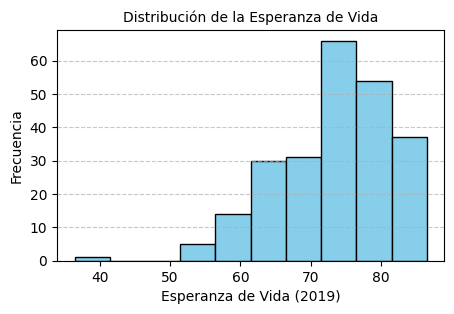

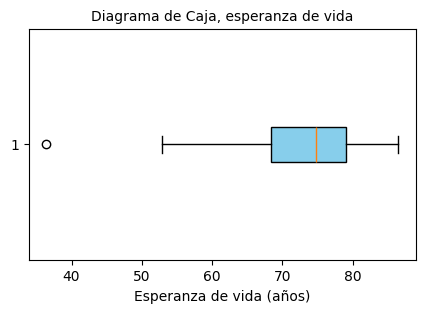

In [268]:
# Histograma de esperanza de vida

life_expectancy = dataframe_unido['Life expectancy'].dropna()

# hago el histograma
plt.figure(figsize=(5, 3))
plt.hist(life_expectancy, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de la Esperanza de Vida', fontsize=10)
plt.xlabel('Esperanza de Vida (2019)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# diagrama de caja
plt.figure(figsize=(5, 3))
plt.boxplot(life_expectancy,vert=False,  patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Diagrama de Caja, esperanza de vida', fontsize=10)
plt.xlabel('Esperanza de vida (años)', fontsize=10)

plt.show()


La mayoría de personas viven más de 70 años

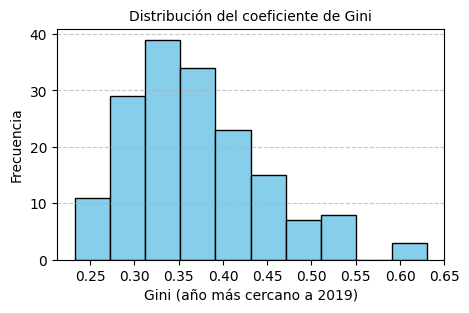

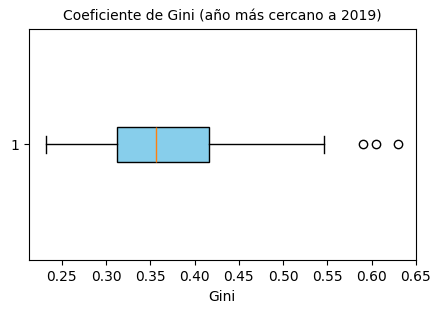

In [269]:
# Histograma de Gini

plt.figure(figsize=(5, 3))
plt.hist(dataframe_unido['Gini coefficient'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del coeficiente de Gini', fontsize=10)
plt.xlabel('Gini (año más cercano a 2019)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# diagrama de caja
plt.figure(figsize=(5, 3))
plt.boxplot(dataframe_unido['Gini coefficient'].dropna(),vert=False,  patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Coeficiente de Gini (año más cercano a 2019)', fontsize=10)
plt.xlabel('Gini', fontsize=10)

plt.show()

Hay unos pocos países cuyo coeficiente de Gini supera 0.45. Esos países son muy desiguales. La mayoría de países se encuentra entre 0.25 y 0.40.

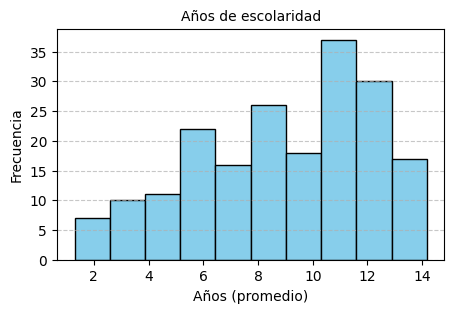

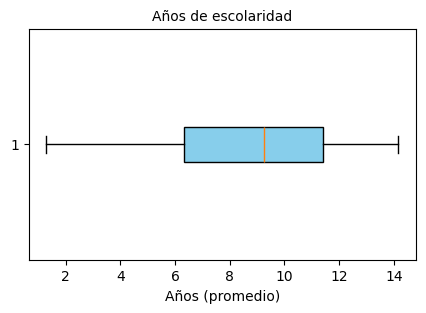

In [270]:
# Histograma de años de escolaridad

escolaridad = dataframe_unido['Average years of schooling']

escolaridad=escolaridad.dropna()

# hago el histograma
plt.figure(figsize=(5, 3))
plt.hist(escolaridad, bins=10, color='skyblue', edgecolor='black')
plt.title('Años de escolaridad', fontsize=10)
plt.xlabel('Años (promedio)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# diagrama de caja
plt.figure(figsize=(5, 3))
plt.boxplot(escolaridad, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Años de escolaridad', fontsize=10)
plt.xlabel('Años (promedio)', fontsize=10)

plt.show()

Los resultados son bastante variados. Hay muchos países con pocos años de escolaridad

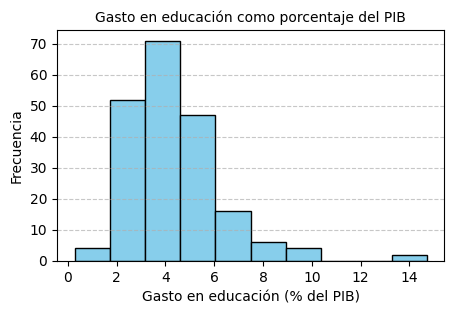

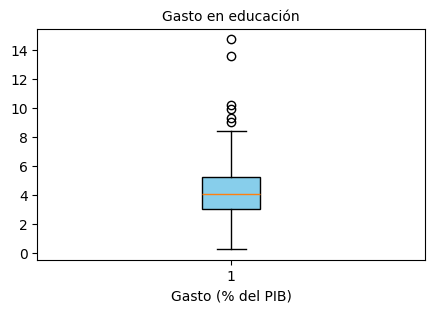

In [271]:
# Histograma de gasto en educación

education_expenditure = dataframe_unido["Education expenditure (% GDP)"]

# hago el histograma
plt.figure(figsize=(5, 3))
plt.hist(education_expenditure, bins=10, color='skyblue', edgecolor='black')
plt.title('Gasto en educación como porcentaje del PIB', fontsize=10)
plt.xlabel('Gasto en educación (% del PIB)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# diagrama de caja
plt.figure(figsize=(5, 3))
plt.boxplot(education_expenditure.dropna(),  patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Gasto en educación', fontsize=10)
plt.xlabel('Gasto (% del PIB)', fontsize=10)

plt.show()


La mayoría de países gastan entre 2 y 6 % de su PIB en educación

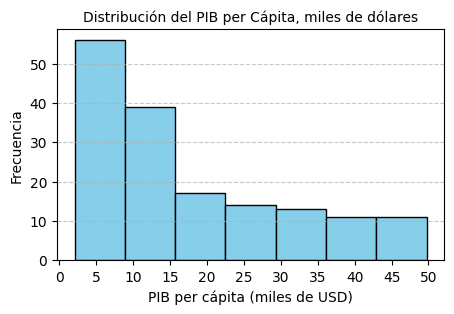

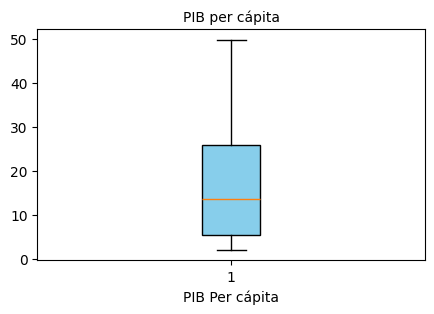

In [272]:
# PIB per cápita 

# Dividir entre 1,000 para que se vea más lindo el histograma (miles de dólares)

gdp_percapita = dataframe_unido['GDP per capita'].dropna() / 1000

# Excluyo valores mayores a 50 000 y menores a 2 000, porque son poco comunes.
gdp_percapita = gdp_percapita[gdp_percapita <= 50]
gdp_percapita = gdp_percapita[gdp_percapita >= 2]

plt.figure(figsize=(5, 3))
plt.hist(gdp_percapita, bins=7, color='skyblue', edgecolor='black')
plt.title('Distribución del PIB per Cápita, miles de dólares', fontsize=10)
plt.xlabel('PIB per cápita (miles de USD)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

max_x = gdp_percapita.max()
# para mostrar los números del eje x en intervalos de 5.
plt.xticks(np.arange(0, max_x + 5, 5))

plt.show()

# diagrama de caja
plt.figure(figsize=(5, 3))
plt.boxplot(gdp_percapita,  patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('PIB per cápita', fontsize=10)
plt.xlabel('PIB Per cápita', fontsize=10)

plt.show()


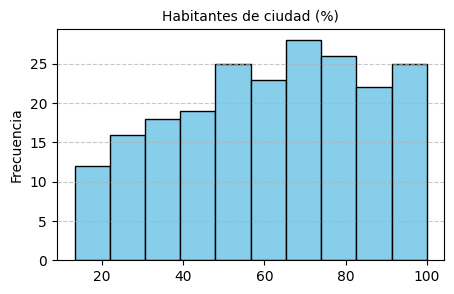

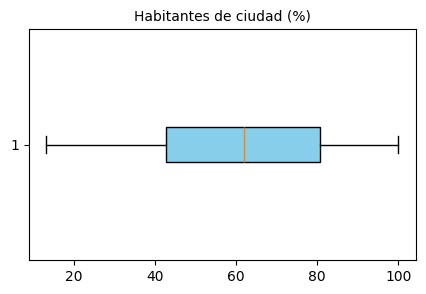

In [273]:
# Porcentaje de personas que viven en la cuidad

citadinos = dataframe_unido["Habitantes de ciudad (%)"].dropna() # no se me ocurrio un nombre menos raro

# hago el histograma
plt.figure(figsize=(5, 3))
plt.hist(citadinos, bins=10, color='skyblue', edgecolor='black')
plt.title('Habitantes de ciudad (%)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# diagrama de caja
plt.figure(figsize=(5, 3))
plt.boxplot(citadinos, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Habitantes de ciudad (%)', fontsize=10)

plt.show()



Los lugares donde vive la gente son bastante variados

## 8. Media y desviación estándar de las variables de interés

In [274]:
# Media y desviación estándar:

def media_y_desviacion(df, variables):
    resultados = {}
    for variable in variables:
      media = df[variable].dropna().mean()
      desviacion = df[variable].dropna().std()
      resultados[variable] = {'Media':media, 'Desviacion':desviacion}

    return resultados

# Variables a las que les hago el calculo
variables = [
    'Average years of schooling', 
    'Education expenditure (% GDP)',
    'Gini coefficient', 
    'GDP growth',
    'GDP per capita',
    'Habitantes de ciudad (%)',
    'Life expectancy'
]

resultados = media_y_desviacion(dataframe_unido, variables)

for var, MyD in resultados.items():

 print(f"{var}: Media = {MyD['Media']:.2f}, Desviación estándar = {MyD['Desviacion']:.2f}")


Average years of schooling: Media = 8.93, Desviación estándar = 3.22
Education expenditure (% GDP): Media = 4.34, Desviación estándar = 1.95
Gini coefficient: Media = 0.37, Desviación estándar = 0.08
GDP growth: Media = 1.53, Desviación estándar = 3.65
GDP per capita: Media = 22185.14, Desviación estándar = 22556.04
Habitantes de ciudad (%): Media = 61.31, Desviación estándar = 23.85
Life expectancy: Media = 73.29, Desviación estándar = 7.73


Los resultados son consistentes con los diagramas de caja e histogramas que hicimos.

## 9 y 10. Diagramas de dispersión y coeficientes de correlación

Los voy a hacer entre el Gini y otras variables.

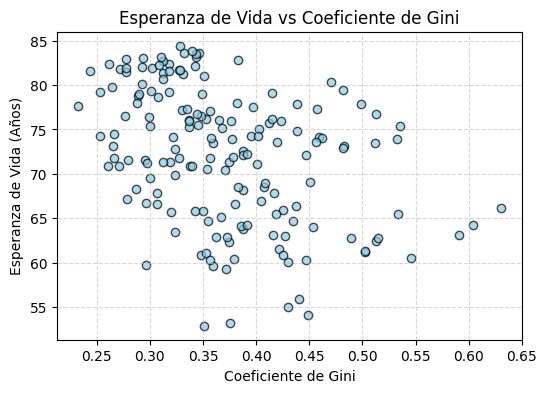

Coeficiente de correlación del coeficiente de Gini y la Esperanza de vida:  -0.3926495655109568


In [275]:
# Esperanza de vida

#se combinan para luego eliminar los nan 
# y que tengan la misma cantidad de filas no nulas
datos_combinados = dataframe_unido[['Gini coefficient', 'Life expectancy']]
datos_combinados = datos_combinados.dropna()

plt.figure(figsize=(6, 4))
plt.scatter(
    datos_combinados['Gini coefficient'],
    datos_combinados['Life expectancy'],
    color='skyblue',
    alpha=0.7,
    edgecolor='black'
)
plt.title('Esperanza de Vida vs Coeficiente de Gini', fontsize=12)
plt.xlabel('Coeficiente de Gini', fontsize=10)
plt.ylabel('Esperanza de Vida (Años)', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

plt.show()
correlacion = datos_combinados['Gini coefficient'].corr(datos_combinados['Life expectancy'])
print("Coeficiente de correlación del coeficiente de Gini y la Esperanza de vida: ",correlacion)


Hay una correlación negativa. Conforme el Gini disminuye (es decir, los países se hacen menos desiguales), la esperanza de vida aumenta.

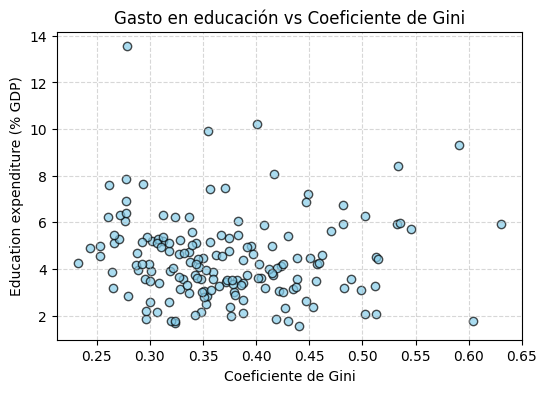

Coeficiente de correlación del coeficiente de Gini y el gasto en educación:  -0.0331966038718308


In [276]:
# gasto en educacion
datos_combinados = dataframe_unido[['Gini coefficient', 'Education expenditure (% GDP)']].dropna()

plt.figure(figsize=(6, 4))
plt.scatter(
    datos_combinados['Gini coefficient'],
    datos_combinados['Education expenditure (% GDP)'],
    color='skyblue',
    alpha=0.7,
    edgecolor='black'
)
plt.title('Gasto en educación vs Coeficiente de Gini', fontsize=12)
plt.xlabel('Coeficiente de Gini', fontsize=10)
plt.ylabel('Education expenditure (% GDP)', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

correlacion = datos_combinados['Gini coefficient'].corr(datos_combinados['Education expenditure (% GDP)'])
print("Coeficiente de correlación del coeficiente de Gini y el gasto en educación: ",correlacion)


La correlación es baja, lo cual resulta extraño.

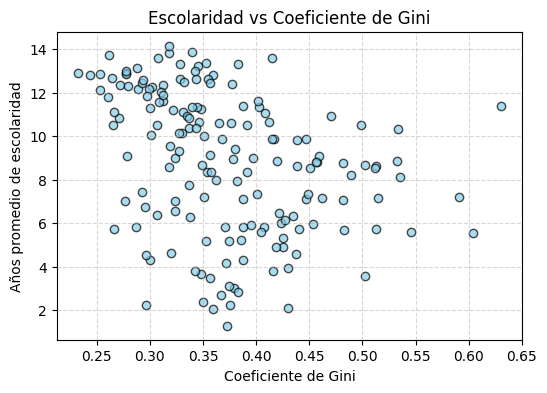

Coeficiente de correlación del coeficiente de Gini y escolaridad:  -0.3364749028593817


In [277]:
# años de escolaridad
datos_combinados = dataframe_unido[['Gini coefficient', 'Average years of schooling']].dropna()

plt.figure(figsize=(6, 4))
plt.scatter(
    datos_combinados['Gini coefficient'],
    datos_combinados['Average years of schooling'],
    color='skyblue',
    alpha=0.7,
    edgecolor='black'
)
plt.title('Escolaridad vs Coeficiente de Gini', fontsize=12)
plt.xlabel('Coeficiente de Gini', fontsize=10)
plt.ylabel('Años promedio de escolaridad', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

correlacion = datos_combinados['Gini coefficient'].corr(datos_combinados['Average years of schooling'])
print("Coeficiente de correlación del coeficiente de Gini y escolaridad: ",correlacion)


Hay una correlación negativa moderada. Los países con más años de escolaridad son menos desiguales.

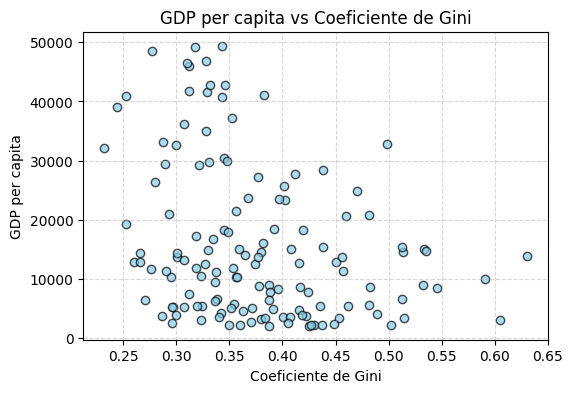

Coeficiente de correlación del coeficiente de Gini y GDP per capita:  -0.30371504305996544


In [278]:
# PIB Per cápita
datos_combinados = dataframe_unido[['Gini coefficient', 'GDP per capita']].dropna()

# excluyo valores fuera de lo común
datos_combinados = datos_combinados[(datos_combinados['GDP per capita'] <= 50000) 
                                    & (datos_combinados['GDP per capita'] >= 2000)]

plt.figure(figsize=(6, 4))
plt.scatter(
    datos_combinados['Gini coefficient'],
    datos_combinados['GDP per capita'],
    color='skyblue',
    alpha=0.7,
    edgecolor='black'
)
plt.title('GDP per capita vs Coeficiente de Gini', fontsize=12)
plt.xlabel('Coeficiente de Gini', fontsize=10)
plt.ylabel('GDP per capita', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

correlacion = datos_combinados['Gini coefficient'].corr(datos_combinados['GDP per capita'])
print("Coeficiente de correlación del coeficiente de Gini y GDP per capita: ",correlacion)

La correlación es moderada y negativa. Los países más ricos son menos desiguales.

## 11. Preguntas que nos interesaría contestar

- ¿ Se reduce la desigualdad conforme incrementa el ingreso per cápita?
- ¿Puedo predecir dentro de un rango el coeficiente de Gini dadas otras variables?
- ¿Es el coeficiente de Gini una buena forma de medir la desigualdad?
- ¿Existen otras variables que tengan mayor correlación con la desigualdad?
- ¿Cuáles países son los más desiguales?, ¿tienen aspectos en común?
- ¿Puedo identificar patrones entre regiones del mundo? Por ejemplo, los países de América Latina y de Europa del Este tienen ingresos per cápita similares, ¿se traduce esto en niveles de desigualdad y desarrollo humano similares?
- ¿Cuáles de los países de nuestro análisis tienen aspectos sobresalientes?


# Segunda parte del proyecto

Se siguió el tutorial proporcionado.

Se consultaron fuentes de información adicionales.

Notas: Las bases de datos de la entrega 1 son muchas y tienen demasiadas filas. En esta entrega, la idea es atender ese problema para no volvernos locos con tanta información. Este problema sucede principalmente con los datos del Banco Mundial. 

## 1. Unificación de bases de datos e inclusión de nuevos datasets

- [Tasa de homicidios](https://ourworldindata.org/homicides)

- [Indice de desarrollo humano](https://ourworldindata.org/grapher/human-development-index)

In [279]:
df_homicidios=pd.read_csv("homicide-rate-unodc.csv")
df_IDH=pd.read_csv("human-development-index.csv")

In [280]:
# Igual que en la primer entrega, 
# filtro por el año más cercano a 2019 usando funcion
# de la entrega 1:

df_homicidios = anno_mas_cercano(df_homicidios)
df_IDH = anno_mas_cercano(df_IDH)


In [281]:
# Renombro columnas usando la función de la entrega 1

df_homicidios = renombrar_col_4(df_homicidios, 'Homicidios (X100k habitantes)')
df_IDH = renombrar_col_4(df_IDH, 'HDI')
#df_IDH.head(5)

In [282]:
# Mi función de la entrega 1 hace esto pero de manera más eficiente. 

# Lo hago aquí sin la función porque el enunciado pide mostrar como unir 
# dataframes y se veria feo ejemplificarlo con la función:

# Si lo nota, no puedo hacerle merge a las 3 al mismo tiempo porque habrian 
# dos columnas "Year" repetidas. 
df = pd.merge( 
    dataframe_unido, 
    df_IDH[['Year','HDI', 'Code' ]], 
    on='Code', 
    how='left' # Estos left conservan las filas del primer dataframe que
     # se le mete: dataframe_unido, es decir, si el dataframe con el que le
     #  hago merge tiene menos filas (porque tiene menos codigos de pais), 
     # lo que se hace es llenar con NaN los paises sin datos en el dataframe 
     # unido. 
)

# Renombro 'Year' a 'Year_HDI' para que siga el formato que ya viene de la 
# primer entrega
df.rename(columns={'Year': 'Year_HDI'}, inplace=True)

dataframe_unido=df
dataframe_unido.head(5)

df = pd.merge( 
    dataframe_unido, 
    df_homicidios[['Year','Homicidios (X100k habitantes)', 'Code' ]], 
    on='Code', 
    how='left'
)

# Renombro 'Year' a 'Year_homicidios' para que siga el formato que ya viene de la 
# primer entrega
df.rename(columns={'Year': 'Year_homicidios'}, inplace=True)

dataframe_unido=df # Para seguir con el nombre, ya estoy acostumbrado

dataframe_unido.head(1000) #prueba, si lo nota, sí se conservan las 238 filas, 
# que es la finalidad del how='left'

# Bueno, 237 si se cuenta la primer fila como cero...


,Entity,Code,Year_life_exp,Life expectancy,Year_education_expenditure,Education expenditure (% GDP),Year_schooling,Average years of schooling,Year_gini,Gini coefficient,...,Year_gdp_per_capita,GDP per capita,Year_urbanization,Habitantes de ciudad (%),Year_continents,Continent,Year_HDI,HDI,Year_homicidios,Homicidios (X100k habitantes)
0,Afghanistan,AFG,2019,63.5645,2017.0,4.343190,2019.0,2.698150,NaN,NaN,...,2019.0,2079.9219,2019.0,25.75400,2023.0,Asia,2019.0,0.492,2019.0,7.180397
1,Albania,ALB,2019,79.2825,2019.0,3.916240,2019.0,10.072996,2019.0,0.301158,...,2019.0,13653.2490,2019.0,61.22900,2023.0,Europe,2019.0,0.800,2019.0,2.261748
2,Algeria,DZA,2019,76.4742,2019.0,6.036907,2019.0,7.020270,2011.0,0.276157,...,2019.0,11627.2800,2019.0,73.18900,2023.0,Africa,2019.0,0.742,2019.0,1.215304
3,American Samoa,ASM,2019,72.3023,2006.0,14.717050,NaN,NaN,NaN,NaN,...,NaN,NaN,2019.0,87.14700,2023.0,Oceania,NaN,NaN,2019.0,0.000000
4,Andorra,AND,2019,83.0039,2019.0,3.150610,2019.0,11.084770,NaN,NaN,...,NaN,NaN,2019.0,87.98400,2023.0,Europe,2019.0,0.865,2020.0,2.574003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Western Sahara,ESH,2019,70.3129,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.0,Africa,NaN,NaN,NaN,NaN
234,World,OWID_WRL,2019,72.7897,2019.0,2.803780,2019.0,8.574383,NaN,NaN,...,2019.0,16877.4730,2019.0,55.62791,NaN,NaN,2019.0,0.739,2019.0,5.555708
235,Yemen,YEM,2019,65.0917,2012.0,5.464790,2019.0,2.687384,2014.0,0.367071,...,NaN,NaN,2019.0,37.27300,2023.0,Asia,2019.0,0.430,2013.0,6.311147
236,Zambia,ZMB,2019,62.7926,2019.0,4.418240,2019.0,7.157122,2022.0,0.514831,...,2019.0,3372.3590,2019.0,44.07200,2023.0,Africa,2019.0,0.574,2015.0,5.249803


In [283]:
# Calculo las correlaciones con el Gini de las dos nuevas variables
datos_combinados = dataframe_unido[['Gini coefficient', 'HDI']].dropna()
correlacion = datos_combinados['Gini coefficient'].corr(datos_combinados['HDI'])
print("Coeficiente de correlación del coeficiente de Gini y el IDH: ",correlacion)

datos_combinados = dataframe_unido[['Gini coefficient', 'Homicidios (X100k habitantes)']].dropna()
correlacion = datos_combinados['Gini coefficient'].corr(datos_combinados['Homicidios (X100k habitantes)'])
print("Coeficiente de correlación del coeficiente de Gini y Homicidios: ",correlacion)

Coeficiente de correlación del coeficiente de Gini y el IDH:  -0.35470819546125454
Coeficiente de correlación del coeficiente de Gini y Homicidios:  0.5198502145052372


In [284]:
# con esta función encuentro el número de fila de cada country code, 
# me permite luego tomar ese munero de fila para hacer calculaciones 
# con solo ingresar el country code en el modelo de regresión.

def guardar_filas_country_code(df, country_code_columna):
    return {country_code: idx for idx, country_code in enumerate(df[country_code_columna])}
filas = guardar_filas_country_code(dataframe_unido, 'Code')

# Ejemplo: quiero saber la fila en que se encuentran los datos de Costa Rica:
index=filas['USA']

pais = dataframe_unido.loc[index, ['Entity']] 
pais = pais.iloc[0]  
print("Los datos de", pais, "se encuentran en la fila", index, "del dataframe")

# Esta logica es a partir de la cual armamos la funcion del inciso 3.

Los datos de United States se encuentran en la fila 225 del dataframe


## 2. Posibles preguntas para nuestro análisis

Predecir una variable en función de varias otras variables:

- ¿Se puede predecir el IDH a partir del PIB per cápita, Gini, homicidios y esperanza de vida?

- ¿Puedo predecir el Gini de un país dada la escolaridad, esperanza de vida, tasa de homicidios, IDH y PIB per cápita?

- ¿Puedo predecir la tasa de homicidios de un país a partir de la escolaridad, gasto en educación, desigualdad e IDH?.


Comparar categorías de datos: 

- ¿Los países del continente africano son más desiguales que los del continente asiático?

- ¿Son los países con IDH altos menos desiguales? (Puedo, a partir de los datos que tengo, clasificar los países por su nivel de IDH)

- ¿Los países con mayor esperanza de vida (encima del promedio) tienen mayor o menor desigualdad que los que tienen menor esperanza de vida?

## 3. Elaborar modelo de regresión lineal múltiple

Preguntas que quiero resolver con mi modelo:

- Las primeras tres del inciso anterior.


In [285]:

# Función del modelo de regresión múltiple según el video de youtube 
# proporcionado para la entrega 2 (En parte, el señor del video hizo algunos errores):


# Apuntes de econometría que me ayudaron a hacer el modelo:
# https://ocw.unican.es/pluginfile.php/1098/course/section/691/Ppt_Ch3_G942_14-15.pdf

#dataframe con el subconjunto de datos, variables independientes, 
# variable dependiente, y el pais al que quiero predecirle "y"
def modelo_regresion(dataframe, var_indep, var_dep, country_code):
    
    # Variables que tendrá el modelo, dentro de donde viene incluida la dependiente.
    # se le hace dropna para que todas las columnas tengan la misma cantidad de filas no nulas
    # y se pueda hacer operaciones con ellas.
    variables = dataframe[var_indep + [var_dep]].dropna()

    # Variable dependiente (columna), la que quiero predecir. 
    y = variables[var_dep].to_list()

    # Variables independientes (columnas)
    x_vars = [variables[var].to_list() for var in var_indep]
    
    # Número de filas (Observaciones), es lo que va en fila
    # 1 columna 1 de la matriz A
    n = len(variables)

    # Medias y desviaciones estandar de cada variable 
    # independiente que voy a usar. 
    medias = [sum(x) / len(x) for x in x_vars]
    desviaciones = [((sum([(xi - media) ** 2 for xi in x]) / len(x)) ** 0.5) for x, media in zip(x_vars, medias)]

    # Estándarización. Nota: se estandariza porque las variables 
    # se miden en proporciones muy distintas. Por ejemplo, el va Gini de 0 a 1,
    #  pero el per capita  tiene valores de decenas de miles. 

    # Esta ficha técnica del Banco Central lo explica a la 
    # perfección para el tipo de datos que estamos manipulando:
    # https://repositorioinvestigaciones.bccr.fi.cr/server/api/core/bitstreams/a2cbbe9f-aa16-4769-ae4f-6bc1a3ab43f9/content
    # Fun fact: La hermana de la profe Kikut (ya pensionada) escribió ese paper!
    independientes_estandarizadas = [[(xi - media) / desv for xi in x] for x, media, desv in zip(x_vars, medias, desviaciones)]

    # Sumatoria de los valores de cada x luego de estandarizar. 
    sums = [sum(x) for x in independientes_estandarizadas]
    # Sumatoria de y, esta no se tiene que estandarizar
    y_sum = sum(y)

    # Calcular las sumatorias de productos para hacer el resto de la matriz
    def sumatoria_productos(m, n):
        return sum([a * b for a, b in zip(m, n)])

    # Sumatorias de productos: 
    productos = {
        'y': [sumatoria_productos(x, y) for x in independientes_estandarizadas],  # y * xn's, vector fila
        'Xn_cuadrado': [sumatoria_productos(x, x) for x in independientes_estandarizadas],  # Cuadrados, n columnas
        'Xn_Xm': [  # Diferentes xn
            [sumatoria_productos(independientes_estandarizadas[i], independientes_estandarizadas[j]) for j in range(len(independientes_estandarizadas))]
            for i in range(len(independientes_estandarizadas))
        ]
    }

    matrizA = [
        [n] + sums  # Primera fila de la matriz A: la constante y sumatoras, n+1 columnas
    ]
    
    for i in range(len(independientes_estandarizadas)):  # La matriz A va a ser cuadrada
        fila = [sums[i]] + [productos['Xn_Xm'][i][j] if i != j else 
                            productos['Xn_cuadrado'][i] for j in 
                            range(len(independientes_estandarizadas))]
        matrizA.append(fila)

    # Crear matriz B, debe ser (n+1)x1, vector columna
    matrizB = [y_sum] + productos['y']

    # Seleccionar el país a predecir
    index = dataframe.index[dataframe['Code'] == country_code].tolist()[0]
    df_pais_a_calcular = variables.loc[index, var_indep].to_list()

    # Estandarizar los valores del pais a calcular para que el resultado tenga sentido
    pais_a_predecir = [1] + [(valor - media) / desv for valor, media, desv in zip(df_pais_a_calcular, medias, desviaciones)]

    # Matriz C, que es un vector columna
    matrizC = [valor for valor in pais_a_predecir]  

    # Inversa de la matriz A, que debe ser del mismo tamaño que A. 
    matriz_inversa_A = np.linalg.inv(matrizA)

    matrizB = np.transpose(matrizB) #se vuelve vector fila

    # Calcular la matriz D
    matrizD = np.dot(matriz_inversa_A, matrizB) #se vuelve vector fila 
    # por las reglas del producto matricial

    prediccion = np.dot(matrizC,matrizD) #vector columna 1xm por vector 
    # fila mx1, da un valor real, que es el resultado de la predicción. 

    # Calculo RSS y TSS, para luego obtener los R cuadrados: 
    #Comparo las predicciones con los valores verdaderos de mi variable dependiente:
    y_estimado = [sum([matrizD[j + 1] * independientes_estandarizadas[j][i] for j in range(len(independientes_estandarizadas))]) + matrizD[0] for i in range(n)]
    e = [(y[i] - y_estimado[i]) for i in range(n)] # en el video, esto seria e, el error
    RSS = sum([residuo ** 2 for residuo in e]) #RSS, suma de los residuos al cuadrado.
    TSS = sum([(yi - (y_sum / n)) ** 2 for yi in y]) #suma de (y predichas menos media de y) al cuadrado

    # Calcular R^2 y R^2 ajustado
 
    R2 = 1 - (RSS / TSS) # Fuente: (https://www.datacamp.com/es/tutorial/adjusted-r-squared), con el 
    # del video no me salía
    R2_ajustado = 1 - (1 - R2) * (n - 1) / (n - len(var_indep) - 1) #len(var_indep) es la 
                                                                # cantidad de variables independientes del modelo
    
    # Error estándar de predicción
    error_estandar = (RSS / (n - len(var_indep) - 1)) ** 0.5

    # Imprimo los resultados: 
    print("Modelo Hecho por Rodrigo y Enrique:")
    print(" ")

    # Coeficientes
    for i, var in enumerate(var_indep):
        print(f"Coeficiente de {var}: {matrizD[i+1]:.4f}")

    # Error estandar
    print(f"Error estándar de predicción: {error_estandar:.4f}")

    #R cuadrado
    print(f"Coeficiente de determinación (R^2): {R2:.4f}")

    #R cuadrado ajustado:
    print(f"Coeficiente ajustado de determinación múltiple (R^2 ajustado): {R2_ajustado:.4f}")

    pais = dataframe['Entity'].loc[dataframe['Code'] == country_code].values[0]

    # Imprimir predicción con el nombre del país, para que se vea bonito. 
    print(f"Predicción del {var_dep}: {prediccion:.2f} para {pais} ({country_code})")

    # aqui meto lo que quiero calcular: 
#modelo_regresion(dataframe_unido, 
      #             ['Gini coefficient', 'GDP per capita', 'Homicidios (X100k habitantes)', 'Life expectancy'], 
        #           'HDI', 
         #          'CRI')  

## 4. Verificación de resultados

Comparo el output que me dio mi modelo al de una funcion de python:

In [286]:
# Modelo usando librerias, para comparar resultados. 
import statsmodels.api as sm #también se podía 
# Sklearn pero en la compu de Enrique no sirve...

# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html 


def regresion_statsmodels(dataframe, var_indep, var_dep, country_code):
    
    variables = dataframe[var_indep + [var_dep]].dropna()
    X = variables[var_indep]
    y = variables[var_dep]

    # Estandarizo por lo establecido en el punto anterior.
    X_estandarizado = (X - X.mean()) / X.std()
    X_estandarizado = sm.add_constant(X_estandarizado)

    modelo = sm.OLS(y, X_estandarizado).fit()

    # Tomo los datos del pais a predecir a partir del indice en que se encuentra.
    index = dataframe.index[dataframe['Code'] == country_code][0]
    vars_indep_pais = variables.loc[index, var_indep]

    # Estandarizo
    pais_estandarizado = (vars_indep_pais - X.mean()) / X.std()

    # add_constant añade una columna de puros 1's cada que se aplica. 
    pais_estandarizado = pais_estandarizado.to_frame().T
    pais_estandarizado = sm.add_constant(pais_estandarizado, has_constant='add')

    # Predicción:

    #tomo el nombre del pais para que se vea lindo
    pais = dataframe['Entity'].loc[dataframe['Code'] == country_code].values[0]
    prediccion = modelo.predict(pais_estandarizado)
    print("modelo de Statsmodels:")
    print(" ")
    print(f"Predicción del {var_dep}: {prediccion[0]:.2f} para {pais} ({country_code})")
    #print(prediccion)

    print(modelo.summary())

#regresion_statsmodels(
  #  dataframe_unido, 
   # ['Gini coefficient', 'GDP per capita', 'Homicidios (X100k habitantes)', 'Life expectancy'], 
   # 'HDI', 'CRI'
#)

In [287]:
# Función para ver los resultados de los dos modelos, el nuestro y el de python:
# Cuando imprime, tenga en cuenta que hay que darle a expandir. 
def ejecutar_modelos(dataframe, var_indep, var_dep, country_code):
    modelo_regresion(dataframe, var_indep, var_dep, country_code)
    regresion_statsmodels(dataframe, var_indep, var_dep, country_code)

ejecutar_modelos(
    dataframe_unido, 
    ['Gini coefficient', 'GDP per capita', 'Homicidios (X100k habitantes)', 'Life expectancy'], 
    'HDI', 
    'CRI'
)

Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: -0.0034
Coeficiente de GDP per capita: 0.0452
Coeficiente de Homicidios (X100k habitantes): 0.0066
Coeficiente de Life expectancy: 0.0892
Error estándar de predicción: 0.0519
Coeficiente de determinación (R^2): 0.8591
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.8550
Predicción del HDI: 0.82 para Costa Rica (CRI)
modelo de Statsmodels:
 
Predicción del HDI: 0.82 para Costa Rica (CRI)
                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     208.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           2.98e-57
Time:                        21:37:43   Log-Likelihood:                 221.16
No. Observations:                 142   AIC:    

#### Los resultados de nuestro modelo son consistentes con los de la función especializada que usamos. Procedemos a responder las tres preguntas escogidas.

In [288]:
#¿Se puede predecir el IDH a partir del PIB per cápita, Gini, homicidios y esperanza de vida?
#Se respondió arriba de este cell, pero lo hago denuevo:

modelo_regresion(
    dataframe_unido, 
    ['Gini coefficient', 'GDP per capita', 'Homicidios (X100k habitantes)', 'Life expectancy'], 
    'HDI', 
    'CRI'
)


Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: -0.0034
Coeficiente de GDP per capita: 0.0452
Coeficiente de Homicidios (X100k habitantes): 0.0066
Coeficiente de Life expectancy: 0.0892
Error estándar de predicción: 0.0519
Coeficiente de determinación (R^2): 0.8591
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.8550
Predicción del HDI: 0.82 para Costa Rica (CRI)


Los R cuadrados son altos, quiere decir que nuestro modelo predice bien el IDH.

In [289]:
# ¿Puedo predecir el Gini de un país dada la escolaridad, esperanza de vida, tasa de homicidios, IDH y PIB per cápita?
modelo_regresion(
    dataframe_unido, 
    ['HDI', 'GDP per capita', 'Homicidios (X100k habitantes)', 'Life expectancy','Average years of schooling' ], 
    'Gini coefficient', 
    'CRI'
)

Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de HDI: 0.0548
Coeficiente de GDP per capita: -0.0073
Coeficiente de Homicidios (X100k habitantes): 0.0333
Coeficiente de Life expectancy: -0.0392
Coeficiente de Average years of schooling: -0.0406
Error estándar de predicción: 0.0641
Coeficiente de determinación (R^2): 0.3759
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3529
Predicción del Gini coefficient: 0.39 para Costa Rica (CRI)


Las variables escogidas tienen poco peso en la variabilidad del coeficiente de Gini, no sirven bien para predecir la desigualdad.

In [290]:
# ¿Puedo predecir la tasa de homicidios de un país a partir de la escolaridad, gasto en educación, desigualdad e IDH?.
modelo_regresion(
    dataframe_unido, 
    ['Gini coefficient', 'Average years of schooling', 'HDI', 'Education expenditure (% GDP)'], 
    'Homicidios (X100k habitantes)', 
    'CRI'
)

Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: 4.8713
Coeficiente de Average years of schooling: 1.2770
Coeficiente de HDI: -1.5251
Coeficiente de Education expenditure (% GDP): 0.8344
Error estándar de predicción: 8.2794
Coeficiente de determinación (R^2): 0.2809
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.2602
Predicción del Homicidios (X100k habitantes): 13.23 para Costa Rica (CRI)


Los coeficientes para escolaridad y gasto en educación no tienen sentido. Adicionalmente, el modelo tiene poca presición.

## 5. Diagramas de dispersión.

Dados los resultados de la pregunta anterior, corresponde hacer diagramas de dispersión entre:

- IDH y esperanza de vida

- Tasa de homicidios y Gini

- Gini y escolaridad 

In [291]:
from scipy import stats

0.9085813964346866 es el coeficiente de correlación


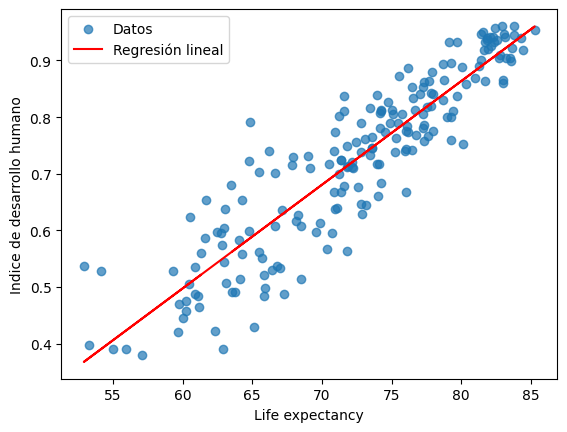

In [292]:
# IDH y esperanza de vida
df= dataframe_unido.dropna(subset=['HDI','Life expectancy'])

x = df['Life expectancy']
y = df['HDI']

# Segun lo visto en el link del lab 4: 
# https://www.w3schools.com/python/python_ml_linear_regression.asp

#Hago la regresion...
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

print(r, "es el coeficiente de correlación")

#grafico
plt.scatter(x, y, label='Datos', alpha=0.7)
plt.plot(x, mymodel, color='red', label='Regresión lineal')
plt.xlabel('Life expectancy')
plt.ylabel('Indice de desarrollo humano')
plt.legend()
plt.show()

-0.35470819546125454 es el coeficiente de correlación


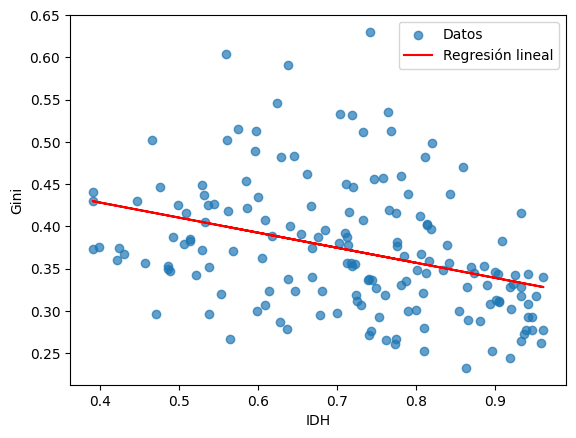

In [293]:
#Gini e IDH
df= dataframe_unido.dropna(subset=['HDI','Gini coefficient'])

x = df['HDI']
y = df['Gini coefficient']

# Segun lo visto en el link del lab 4: 
# https://www.w3schools.com/python/python_ml_linear_regression.asp

#Hago la regresion...
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

# Aplica el modelo
mymodel = list(map(myfunc, x))

print(r, "es el coeficiente de correlación")

#grafico
plt.scatter(x, y, label='Datos', alpha=0.7)
plt.plot(x, mymodel, color='red', label='Regresión lineal')
plt.xlabel('IDH')
plt.ylabel('Gini')
plt.legend()
plt.show()

0.5198502145052372 es el coeficiente de correlación


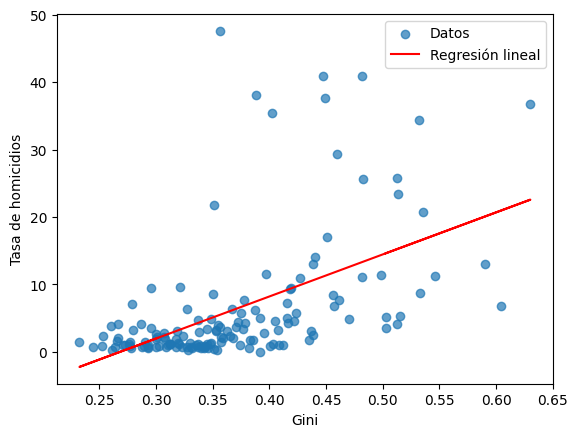

In [294]:
# Gini y escolaridad (omitiendo que ya le hice un scatterplot a gini 
# y homicidios), sería nada mas cambiar a gini a y y a homicidios a x...
df= dataframe_unido.dropna(subset=['Gini coefficient','Homicidios (X100k habitantes)'])

y = df['Homicidios (X100k habitantes)']
x = df['Gini coefficient']

# Segun lo visto en el link del lab 4: 
# https://www.w3schools.com/python/python_ml_linear_regression.asp

#Hago la regresion...
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

# Aplica el modelo
mymodel = list(map(myfunc, x))

print(r, "es el coeficiente de correlación")

#grafico
plt.scatter(x, y, label='Datos', alpha=0.7)
plt.plot(x, mymodel, color='red', label='Regresión lineal')
plt.xlabel('Gini')
plt.ylabel('Tasa de homicidios')
plt.legend()
plt.show()

## 6. predicción de valores hipotéticos

In [295]:
# Esta pregunta está complicada de enteder...

# Dada la función con que hice mi modelo, lo que tengo que hacer es agregar 
# al dataframe un fila para cada grupo de datos que quiero predecir:

# lo voy a hacer con 3 variables cada una (una dependiente, dos independientes).
#  Si no, duro toda la vida en hacerlo

dataframe_unido_tmp= dataframe_unido

# Me invento paises
fortnite = {'Entity': 'Fortnite',
            'Code': 'FTN',
            'Gini coefficient': 0.67,
            'Life expectancy': 66.66,
            'Homicidios (X100k habitantes)': 99}

AECCI = {'Entity': 'Alianza de Estados Confederados de las Islas Celestiales e Invernales',
         'Code': 'AECCI',
         'Gini coefficient': 0.37,
         'Life expectancy': 77.0,
         'Homicidios (X100k habitantes)': 12}

casa_esteban = {'Entity': 'Casa de Esteban',
                'Code': 'CSE',
                'Gini coefficient': 0.38,
                'Life expectancy': 78,
                'Homicidios (X100k habitantes)': 0.01}

nuevas_filas = pd.DataFrame([fortnite, AECCI, casa_esteban])

# las agrego al dataframe
dataframe_unido_tmp = pd.concat([dataframe_unido_tmp, nuevas_filas], ignore_index=True)


In [296]:
# Gini, esperanza de vida, y homicidios de la AECCI:

#predecir homicidios
modelo_regresion(
    dataframe_unido_tmp, 
    ['Gini coefficient', 'Life expectancy'], 
    'Homicidios (X100k habitantes)', 
    'AECCI'
)
print(" ")
#Predecir Gini
modelo_regresion(
    dataframe_unido_tmp, 
    ['Homicidios (X100k habitantes)', 'Life expectancy'], 
    'Gini coefficient', 
    'AECCI'
)
print(" ")
#Predecir la esperanza de vida
modelo_regresion(
    dataframe_unido_tmp, 
    ['Gini coefficient', 'Homicidios (X100k habitantes)'], 
    'Life expectancy', 
    'AECCI'
)
print(" ")

Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: 6.8042
Coeficiente de Life expectancy: -0.2758
Error estándar de predicción: 10.0118
Coeficiente de determinación (R^2): 0.3277
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3186
Predicción del Homicidios (X100k habitantes): 6.67 para Alianza de Estados Confederados de las Islas Celestiales e Invernales (AECCI)
 
Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Homicidios (X100k habitantes): 0.0413
Coeficiente de Life expectancy: -0.0229
Error estándar de predicción: 0.0644
Coeficiente de determinación (R^2): 0.4000
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3918
Predicción del Gini coefficient: 0.38 para Alianza de Estados Confederados de las Islas Celestiales e Invernales (AECCI)
 
Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: -2.6827
Coeficiente de Homicidios (X100k habitantes): -0.1962
Error estándar de predicción: 6.3863
Coeficiente de determ

In [297]:
# Gini, esperanza de vida, y homicidios de Fortnite:

#predecir homicidios
modelo_regresion(
    dataframe_unido_tmp, 
    ['Gini coefficient', 'Life expectancy'], 
    'Homicidios (X100k habitantes)', 
    'FTN'
)
print(" ")
#Predecir Gini
modelo_regresion(
    dataframe_unido_tmp, 
    ['Homicidios (X100k habitantes)', 'Life expectancy'], 
    'Gini coefficient', 
    'FTN'
)
print(" ")
#Predecir la esperanza de vida
modelo_regresion(
    dataframe_unido_tmp, 
    ['Gini coefficient', 'Homicidios (X100k habitantes)'], 
    'Life expectancy', 
    'FTN'
)
print(" ")

Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: 6.8042
Coeficiente de Life expectancy: -0.2758
Error estándar de predicción: 10.0118
Coeficiente de determinación (R^2): 0.3277
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3186
Predicción del Homicidios (X100k habitantes): 31.90 para Fortnite (FTN)
 
Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Homicidios (X100k habitantes): 0.0413
Coeficiente de Life expectancy: -0.0229
Error estándar de predicción: 0.0644
Coeficiente de determinación (R^2): 0.4000
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3918
Predicción del Gini coefficient: 0.71 para Fortnite (FTN)
 
Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: -2.6827
Coeficiente de Homicidios (X100k habitantes): -0.1962
Error estándar de predicción: 6.3863
Coeficiente de determinación (R^2): 0.1639
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.1526
Predicción del Life expectancy: 6

In [298]:
# Gini, esperanza de vida, y homicidios de la casa de Esteban:

#predecir homicidios
modelo_regresion(
    dataframe_unido_tmp, 
    ['Gini coefficient', 'Life expectancy'], 
    'Homicidios (X100k habitantes)', 
    'CSE'
)
print(" ")
#Predecir Gini
modelo_regresion(
    dataframe_unido_tmp, 
    ['Homicidios (X100k habitantes)', 'Life expectancy'], 
    'Gini coefficient', 
    'CSE'
)
print(" ")
#Predecir la esperanza de vida
modelo_regresion(
    dataframe_unido_tmp, 
    ['Gini coefficient', 'Homicidios (X100k habitantes)'], 
    'Life expectancy', 
    'CSE'
)
print(" ")

Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: 6.8042
Coeficiente de Life expectancy: -0.2758
Error estándar de predicción: 10.0118
Coeficiente de determinación (R^2): 0.3277
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3186
Predicción del Homicidios (X100k habitantes): 7.46 para Casa de Esteban (CSE)
 
Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Homicidios (X100k habitantes): 0.0413
Coeficiente de Life expectancy: -0.0229
Error estándar de predicción: 0.0644
Coeficiente de determinación (R^2): 0.4000
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.3918
Predicción del Gini coefficient: 0.33 para Casa de Esteban (CSE)
 
Modelo Hecho por Rodrigo y Enrique:
 
Coeficiente de Gini coefficient: -2.6827
Coeficiente de Homicidios (X100k habitantes): -0.1962
Error estándar de predicción: 6.3863
Coeficiente de determinación (R^2): 0.1639
Coeficiente ajustado de determinación múltiple (R^2 ajustado): 0.1526
Predicción del Life 

Para los tres países imaginarios, los resultados obtenidos fueron consistentes con lo esperado. Se predice que en fortnite, que es el menos desarrollado, las métricas van a ser menos alentadoras. En la AECCI y la casa de Esteban, las predicciones son más positivas, cosa que tiene sentido dadas las métricas que tienen, propias de un país desarrollado. 

## 7. Reflexiones sobre nuestro modelo

El principal alcance de estos modelos es que puedo completar datos que no tengo a partir de otros que sí. Por ejemplo, es necesario saber varias métricas económicas y demográficas del país siempre, pero no resultaría económicamente razonable hacer un censo cada mes para obtener datos. Sale mejor tener un modelo que se sepa que es preciso, y darle un subconjunto de datos que sí se recopilan en intervalos de tiempo menores que un censo, como la ENAHO del INEC. Luego, a partir de esos datos que sí tengo, puedo predecir los datos que no recopilé.

Una limitación que puede haber es que hayan variables difíciles de predecir, o que las variables independientes que usemos para la predicción terminen no resultando ser buenos predictores.

Por ejemplo, existe lo que se conoce como [correlaciones espurias](https://www.tylervigen.com/spurious-correlations), que son dos variables con un coeficiente de correlación alto, pero que en la vida real no tienen nada que ver.

Además, si tengo pocos datos, eso limita mis posibilidades de tener una buena predicción. Eso tiene lógica. De hecho, nosotros tuvimos que rehacer este trabajo DOS VECES!!!! porque los datasets que teníamos estaban llenos de NaN's. A la tercera versión del trabajo, ya teníamos datos relativamente fiables, pero el Gini, que es el tema principal del trabajo, estaba recopilado en una base de datos que no tenia para todos los paises el año 2019. En muchos casos no tenía siquiera datos de 5 años antes. Esto afectó negativamente los resultados.

[Según este enlace](https://medium.com/@lktsdvd/the-difference-between-large-language-models-llms-and-traditional-machine-learning-models-c338af4b01b3) la principal diferencia es que el LLM busca generar (respuestas) a partir de una entrada (pregunta) y datos no estructurados, que son por ejemplo textos. El modelo de regresión hace predicciones a partir de datos estructurados y etiquetados (una base de datos).

En ambos casos, predicen algo, y lo hacen a partir de datos, pero el formato de los datos y lo que buscan predecir es lo que los diferencia.


## 8. Grupos categoricos

Tenemos las siguiente preguntas planteadas en el punto 2:

- ¿Los países del continente africano son más desiguales que los del continente asiático?

- ¿Son los países con IDH altos menos desiguales? (Puedo, a partir de los datos que tengo, clasificar los países por su nivel de IDH)

- ¿Los países con mayor esperanza de vida (encima del promedio) tienen mayor o menor desigualdad que los que tienen menor esperanza de vida?

Bajo los titulos de las preguntas, a modo de descripcion, se encuentran las respuestas a las mismas, bajo el texto se puede apreciar el codigo.

### ¿Los países del continente africano son más desiguales que los del continente asiático?

Se tomaron todos los datos conjuntos, se filtraron y se separaron los países categorizados en Africanos y Asiáticos. Seguidamente se les calculó el promedio del índice de Gini a ambos subsets. Tenemos entonces lo siguiente:

**Promedio de Índice de Gini de los países Africanos:** `0.411217`  
**Promedio de Índice de Gini de los países Asiáticos:** `0.335832`  

Ahora, si tomamos en cuenta que el Índice de Gini se mide en una escala de 0 a 1, donde 0 es igualdad total y 1 desigualdad total, podemos entonces decir que los países Africanos son más desiguales que los Asiáticos.

Como dato extra, compararemos los países más y menos desiguales de ambos grupos entre sí:

* El país Africano con mayor desigualdad es **Sudáfrica** con un índice de Gini de `0.630258`.
* El país Asiático con mayor desigualdad es **Turquía** con un índice de Gini de `0.438338`.  

Podemos apreciar entonces que entre los dos países más desiguales, el de mayor desigualdad es **South Africa**.

* El país Africano con menor desigualdad es **Algeria** con un índice de Gini de `0.276157`.
* El país Asiático con menor desigualdad es **United Arab Emirates** con un índice de Gini de `0.26399`.

Nuevamente apreciamos que entre ambas categorías, Africa es más desigual.

In [299]:
# Primero debo separar el dataFrame en dos subgrupos, donde se contenga a los paises del continente africano y otro con el continente asiatico.
# Visualizamos los continentes disponibles, podemos ver que hay algunos con NaN, asi que para crear los grupos se omitiran los NaN en la columna 'Continent'.
df8 = dataframe_unido
print("Valor de 'Continent' en df8:\n", df8['Continent'].unique(), "\n")

df81 = df8[df8['Continent'].notna()] # Aqui lo que se hace es crear un nuevo dataFrame como copia del anterior y se omiten las filas con NaN en 'Continen'.

# Se puede apreciar que el nuevo dataFrame no contiene NaN en 'Continent'
print("Valor de 'Continent' en df81:\n", df81['Continent'].unique())

Valor de 'Continent' en df8:
 ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America' nan] 

Valor de 'Continent' en df81:
 ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


In [300]:
# Ahora que no tenemos NaN podemos crear los dos subgrupos, Paises Africanos y paises Asiaticos.
dfAfrica = df81[df81['Continent'] == 'Africa'].reset_index(drop = True)
dfAsia = df81[df81['Continent'] == 'Asia'].reset_index(drop = True)

# Para una mejor visualizacion colocamos el limite de pandas display a 10 filas.
pd.set_option('display.max_rows', 10)

print("Grupo de paises Africanos:\n")
display(dfAfrica)
print("\nGrupo de paises Asiaticos:")
display(dfAsia)

Grupo de paises Africanos:



,Entity,Code,Year_life_exp,Life expectancy,Year_education_expenditure,Education expenditure (% GDP),Year_schooling,Average years of schooling,Year_gini,Gini coefficient,...,Year_gdp_per_capita,GDP per capita,Year_urbanization,Habitantes de ciudad (%),Year_continents,Continent,Year_HDI,HDI,Year_homicidios,Homicidios (X100k habitantes)
0,Algeria,DZA,2019,76.4742,2019.0,6.036907,2019.0,7.020270,2011.0,0.276157,...,2019.0,11627.2800,2019.0,73.189,2023.0,Africa,2019.0,0.742,2019.0,1.215304
1,Angola,AGO,2019,62.4484,2019.0,2.073064,2019.0,5.734512,2018.0,0.512640,...,2019.0,6602.2690,2019.0,66.177,2023.0,Africa,2019.0,0.597,2016.0,4.102248
2,Benin,BEN,2019,60.4537,2019.0,3.002736,2019.0,3.033540,2018.0,0.379486,...,2019.0,3156.4387,2019.0,47.861,2023.0,Africa,2019.0,0.506,NaN,NaN
3,Botswana,BWA,2019,65.4636,2019.0,8.398996,2019.0,10.340000,2015.0,0.533250,...,2019.0,15117.6850,2019.0,70.172,2023.0,Africa,2019.0,0.703,2020.0,8.678912
4,Burkina Faso,BFA,2019,60.0391,2019.0,5.407137,2019.0,2.101710,2018.0,0.430167,...,2019.0,2106.0361,2019.0,29.980,2023.0,Africa,2019.0,0.446,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Tunisia,TUN,2019,75.9933,2015.0,6.220450,2019.0,7.786245,2021.0,0.337164,...,2019.0,11113.7960,2019.0,69.254,2023.0,Africa,2019.0,0.740,2019.0,4.738859
54,Uganda,UGA,2019,62.9913,2019.0,2.308281,2019.0,6.147214,2019.0,0.427026,...,2019.0,2250.0150,2019.0,24.361,2023.0,Africa,2019.0,0.544,2019.0,10.985102
55,Western Sahara,ESH,2019,70.3129,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.0,Africa,NaN,NaN,NaN,NaN
56,Zambia,ZMB,2019,62.7926,2019.0,4.418240,2019.0,7.157122,2022.0,0.514831,...,2019.0,3372.3590,2019.0,44.072,2023.0,Africa,2019.0,0.574,2015.0,5.249803



Grupo de paises Asiaticos:


,Entity,Code,Year_life_exp,Life expectancy,Year_education_expenditure,Education expenditure (% GDP),Year_schooling,Average years of schooling,Year_gini,Gini coefficient,...,Year_gdp_per_capita,GDP per capita,Year_urbanization,Habitantes de ciudad (%),Year_continents,Continent,Year_HDI,HDI,Year_homicidios,Homicidios (X100k habitantes)
0,Afghanistan,AFG,2019,63.5645,2017.0,4.343190,2019.0,2.698150,NaN,NaN,...,2019.0,2079.9219,2019.0,25.754,2023.0,Asia,2019.0,0.492,2019.0,7.180397
1,Armenia,ARM,2019,75.4386,2019.0,2.571912,2019.0,11.282730,2019.0,0.300312,...,2019.0,14317.5530,2019.0,63.219,2023.0,Asia,2019.0,0.789,2019.0,2.588100
2,Azerbaijan,AZE,2019,73.1023,2019.0,3.176460,2019.0,10.542970,2005.0,0.265549,...,2019.0,14442.0410,2019.0,56.031,2023.0,Asia,2019.0,0.762,2019.0,1.641787
3,Bahrain,BHR,2019,80.0186,2019.0,2.384605,2019.0,10.797340,NaN,NaN,...,2019.0,49768.9770,2019.0,89.394,2023.0,Asia,2019.0,0.888,2019.0,0.267704
4,Bangladesh,BGD,2019,72.8057,2019.0,1.681388,2019.0,6.549980,2016.0,0.323853,...,2019.0,5467.2075,2019.0,37.405,2023.0,Asia,2019.0,0.646,2018.0,2.339875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Turkmenistan,TKM,2019,69.0016,2019.0,3.192010,2019.0,11.078560,1998.0,0.408069,...,2019.0,14992.6040,2019.0,52.048,2023.0,Asia,2019.0,0.732,2015.0,1.092530
46,United Arab Emirates,ARE,2019,79.7262,2019.0,3.860210,2019.0,12.694030,2018.0,0.263990,...,2019.0,71782.1600,2019.0,86.789,2023.0,Asia,2019.0,0.933,2019.0,0.694772
47,Uzbekistan,UZB,2019,71.3441,2019.0,6.295347,2019.0,11.895590,2022.0,0.311848,...,2019.0,7403.7427,2019.0,50.433,2023.0,Asia,2019.0,0.725,2019.0,1.200839
48,Vietnam,VNM,2019,74.0929,2019.0,3.084998,2019.0,8.370280,2018.0,0.357155,...,2019.0,10252.0040,2019.0,36.628,2023.0,Asia,2019.0,0.717,2011.0,1.537084


In [301]:
# Ahora podemos calcular el promedio del indice Gini para cada subset y luego comparar, esto con el fin de visualizar que subset tiene, en promedio, un indice Gini mas alto, por ende mayor desigualdad.
giniAfrica = dfAfrica['Gini coefficient'].mean()
giniAsia = dfAsia['Gini coefficient'].mean()

# Visualizamos los valores del indice de Gini para cada subset.
print(f"Promedio de indice de Gini para paises Africanos: {giniAfrica: .6f}\n" )
print(f"Promedio de indice de Gini para paises Asiaticos: {giniAsia: .6f}")

Promedio de indice de Gini para paises Africanos:  0.411217

Promedio de indice de Gini para paises Asiaticos:  0.335832


In [302]:
# Para tener un mayor entendimiento de la desigualdad, comparamos los paises Africanos y Asiaticos con mayor y menor indice Gini.
# Encontramos el pais Africano con el mayor indice Gini y tambien el Asiatico.

maxAfrica = dfAfrica.iloc[dfAfrica['Gini coefficient'].idxmax()] # Esto nos devuelve el indice con mayor Gini y luego con el iloc usamos ese indice para acceder a la fila.
resultado = maxAfrica[['Entity', 'Continent', 'Gini coefficient']].to_frame().T.to_string(index = False) # Da formato de dos reglones en lugar de formato de tabla.
print(f"El pais Africano con mayor desigualdad es el siguiente:\n{resultado}")

maxAsia = dfAsia.iloc[dfAsia['Gini coefficient'].idxmax()]
resultado = maxAsia[['Entity', 'Continent', 'Gini coefficient']].to_frame().T.to_string(index = False)
print(f"\nEl pais Asiatico con mayor desigualdad es el siguiente:\n{resultado}")

print("\n=-=-=-=-=-=-Hola, soy un separador de linea-=-=-=-=-=-=")

# Ahora comparamos los paises con menor indice de Gini para ambos grupos.
minAfrica = dfAfrica.iloc[dfAfrica['Gini coefficient'].idxmin()]
resultado = minAfrica[['Entity', 'Continent', 'Gini coefficient']].to_frame().T.to_string(index = False)
print(f"\nEl pais Africano con menor desigualdad es el siguiente:\n{resultado}")

minAsia = dfAsia.iloc[dfAsia['Gini coefficient'].idxmin()]
resultado = minAsia[['Entity', 'Continent', 'Gini coefficient']].to_frame().T.to_string(index = False)
print(f"\nEl pais Asiatico con menor desigualdad es el siguiente:\n{resultado}")

El pais Africano con mayor desigualdad es el siguiente:
      Entity Continent Gini coefficient
South Africa    Africa         0.630258

El pais Asiatico con mayor desigualdad es el siguiente:
Entity Continent Gini coefficient
Turkey      Asia         0.438338

=-=-=-=-=-=-Hola, soy un separador de linea-=-=-=-=-=-=

El pais Africano con menor desigualdad es el siguiente:
 Entity Continent Gini coefficient
Algeria    Africa         0.276157

El pais Asiatico con menor desigualdad es el siguiente:
              Entity Continent Gini coefficient
United Arab Emirates      Asia          0.26399


### ¿Son los países con IDH altos menos desiguales?

Para esta pregunta, nos guiaremos para clasificar el IDH en alto a través del [siguiente criterio](https://www.researchgate.net/figure/Human-Development-Index-Classification_tbl2_349671305).

Podemos apreciar que los países con IDH más alto tienen un promedio del Índice de Gini más bajo con respecto al grupo de los países con el IDH más bajo. Más precisamente, los países con el IDH alto tienen un promedio del Índice de Gini de `0.355740`, mientras que los países con el IDH más bajo tienen un promedio del Índice de Gini de `0.395523`. Esto nos da a entender que, entre más alto sea el IDH, más bajo será el promedio del Índice de Gini y, por tanto, menor la desigualdad. Sin embargo, la diferencia es menos significativa de lo que uno generalmente pensaria.

In [303]:
# Tomamos IDH alto a partir de 0.7 y los que sean menores se tomaran como IDH bajo.

bajoIDH = dataframe_unido[dataframe_unido['HDI'] < 0.7].reset_index(drop = True) # El reset index nos sirve para hacer un frame limpio sin saltos de indice.
bajoIDH['Desarrollo'] = 'Bajo'
# Verificamos que el indice mas alto de HDI no sea 0.70.
print(f"El mayor HDI del grupo de bajos es: {bajoIDH.iloc[bajoIDH['HDI'].idxmax()]['HDI']}\n")

altoIDH = dataframe_unido[dataframe_unido['HDI'] >= 0.7].reset_index(drop = True)
altoIDH['Desarrollo'] = 'Alto'
# Verificamos que el HDI mas bajo sea como minimo 0.7.
print(f"El menor HDI del grupo de altos es: {altoIDH.iloc[altoIDH['HDI'].idxmin()]['HDI']}")

El mayor HDI del grupo de bajos es: 0.699

El menor HDI del grupo de altos es: 0.702


In [304]:
# Nuevamente, usaremos el promedio del indice de Gini.
giniBajo = bajoIDH['Gini coefficient'].mean()
giniAlto = altoIDH['Gini coefficient'].mean()

# Imprimimos el promedio de ambos grupos para la comparacion.
print(f" El promedio de Indice Gini de los grupos bajos en HDI es: {giniBajo: .6f}\n",
    f"El promedio de Indice Gini de los grupos altos de HDI es: {giniAlto: .6f}")

 El promedio de Indice Gini de los grupos bajos en HDI es:  0.395523
 El promedio de Indice Gini de los grupos altos de HDI es:  0.355740


### ¿Los países con mayor esperanza de vida (encima del promedio) tienen mayor o menor desigualdad que los que tienen menor esperanza de vida?

Podemos apreciar que los países con mayor esperanza de vida poseen menores índices de Gini que los países con menor esperanza de vida. Esto se traduce en que los países con mayor esperanza de vida tienen menos desigualdad que los países con menor esperanza de vida. Más exactamente, tenemos los siguientes datos:

* Promedio del Índice de Gini en países con ***baja*** esperanza de vida: `0.388807`.
* Promedio del Índice de Gini en países con ***alta*** esperanza de vida: `0.352708`.

In [305]:
# Para respnder a esta pregunta primero tomaremos el dataFrame, calcularemos el promedio de vida con 'Life expectancy' y haremos dos grupos.
promedioVida = dataframe_unido['Life expectancy'].mean()
print(f" Promedio de vida: {promedioVida}")

# Creamos el grupo de esperanza de vida baja y alta, rigiendonos por el promedio anteriormente calculado.
altaVida = dataframe_unido[dataframe_unido['Life expectancy'] >= promedioVida].reset_index(drop = True)
altaVida['Esperanza de Vida'] = 'Alta'
bajaVida = dataframe_unido[dataframe_unido['Life expectancy'] < promedioVida].reset_index(drop = True)
bajaVida['Esperanza de Vida'] = 'Baja'

# Calculamos los promedios del Indice de Gini para los grupos de Esperanza de Vida alta y baja.
altaVidaPromedio = altaVida['Life expectancy'].mean()
bajaVidaPromedio = bajaVida['Life expectancy'].mean()

# Imprimimos los promedios de Esperanza de Vida de ambos grupos para corroborar que no baje del promedio general en el caso de altos
# y que no suba en el caso de bajos.
print(f" El promedio de Esperanza de Vida de los grupos bajos en Esperanza de Vida es: {bajaVidaPromedio: .6f}\n",
    f"El promedio de Esperanza de Vida de los grupos altos de Esperanza de Vida es: {altaVidaPromedio: .6f}")

# Es un separador de linea.
print("\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\n")

# Calculamos los promedios del Indice de Gini para ambos grupos, usamos las variables anteriormente creadas.
altaVidaPromedio = altaVida['Gini coefficient'].mean()
bajaVidaPromedio = bajaVida['Gini coefficient'].mean()

# Imprimimos los promedios del Indice de Gini para ambos grupos y comparamos.
print(f" El promedio de Indice Gini de los grupos bajos en Esperanza de Vida es: {bajaVidaPromedio: .6f}\n",
    f"El promedio de Indice Gini de los grupos altos de Esperanza de Vida es: {altaVidaPromedio: .6f}")

 Promedio de vida: 73.28700126050421
 El promedio de Esperanza de Vida de los grupos bajos en Esperanza de Vida es:  66.112697
 El promedio de Esperanza de Vida de los grupos altos de Esperanza de Vida es:  78.667729

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

 El promedio de Indice Gini de los grupos bajos en Esperanza de Vida es:  0.388807
 El promedio de Indice Gini de los grupos altos de Esperanza de Vida es:  0.352708


## 9. Analisis con diagramas de cajas

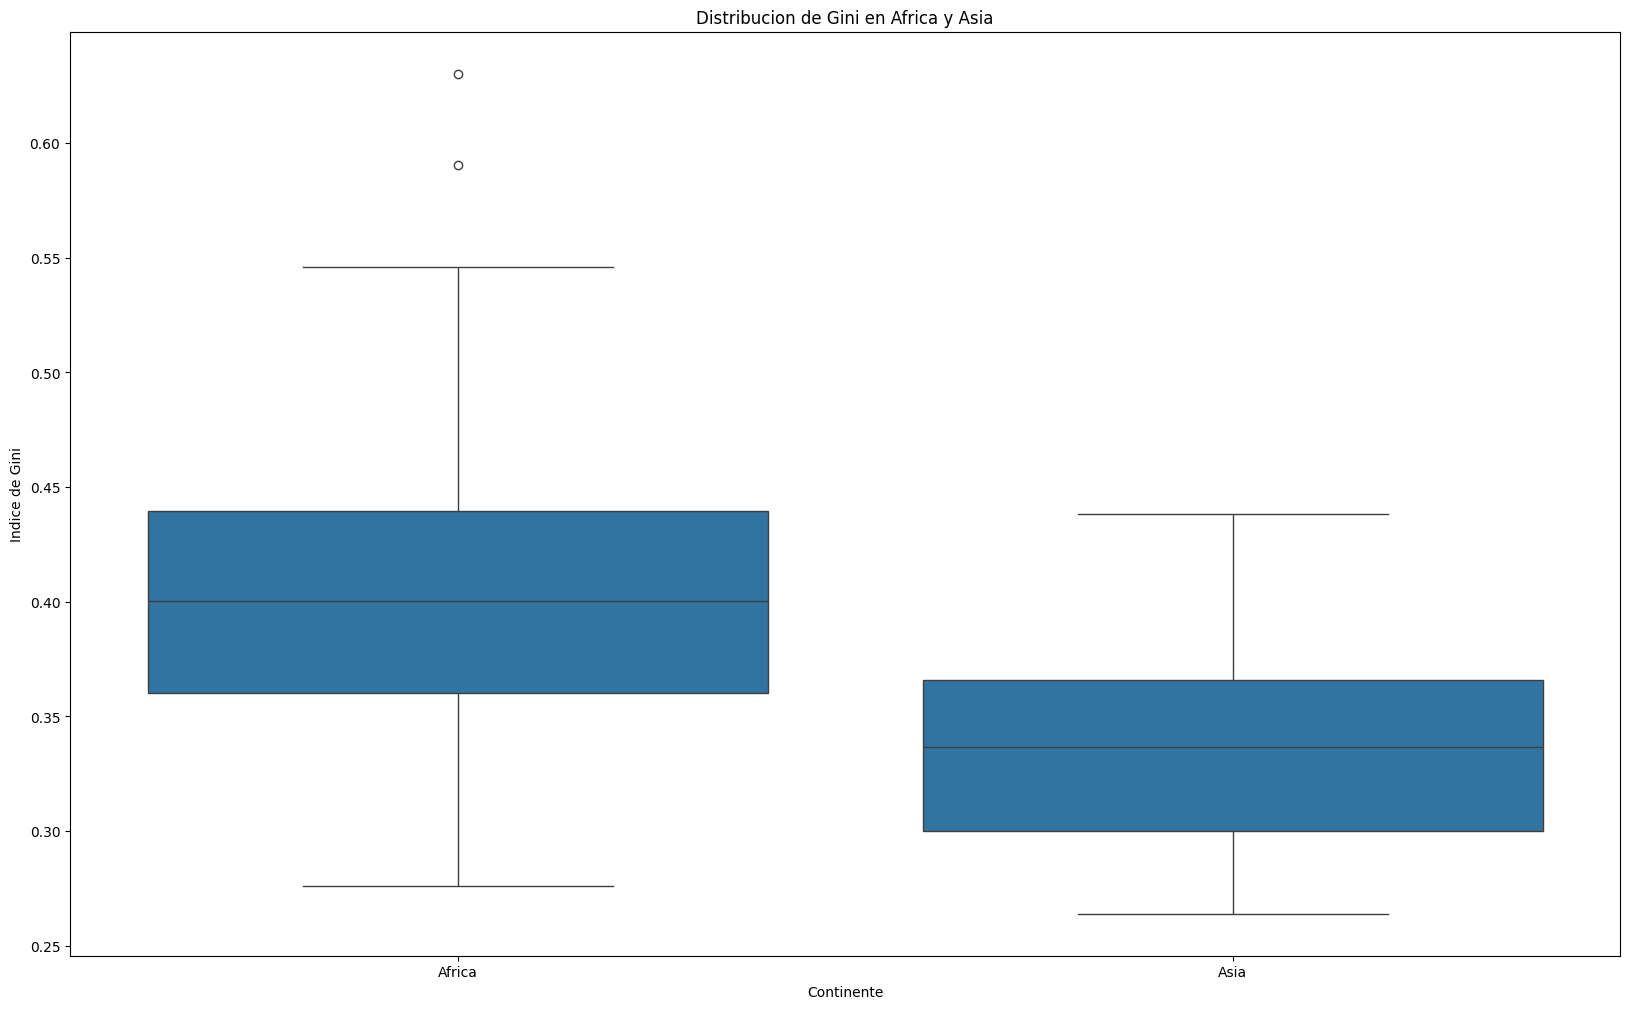

In [306]:
# Importamos Seaborn
import seaborn as sns
# Primero concatenamos el subset de Africa y el de Asia.
dfAfricaAsiatica = pd.concat([dfAfrica, dfAsia]).reset_index(drop = True)

# Ahora creamos el diagrama de cajas, tomamos x como Continente y Y el Gini.
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'Continent', y = 'Gini coefficient', data = dfAfricaAsiatica)
plt.title('Distribucion de Gini en Africa y Asia')
plt.xlabel('Continente')
plt.ylabel('Indice de Gini')

# Mostramos el grafico.
plt.show()

Se puede apreciar que Africa tiene mayor desigualdad (Indice de Gini), tambien se aprecian dos outliers.

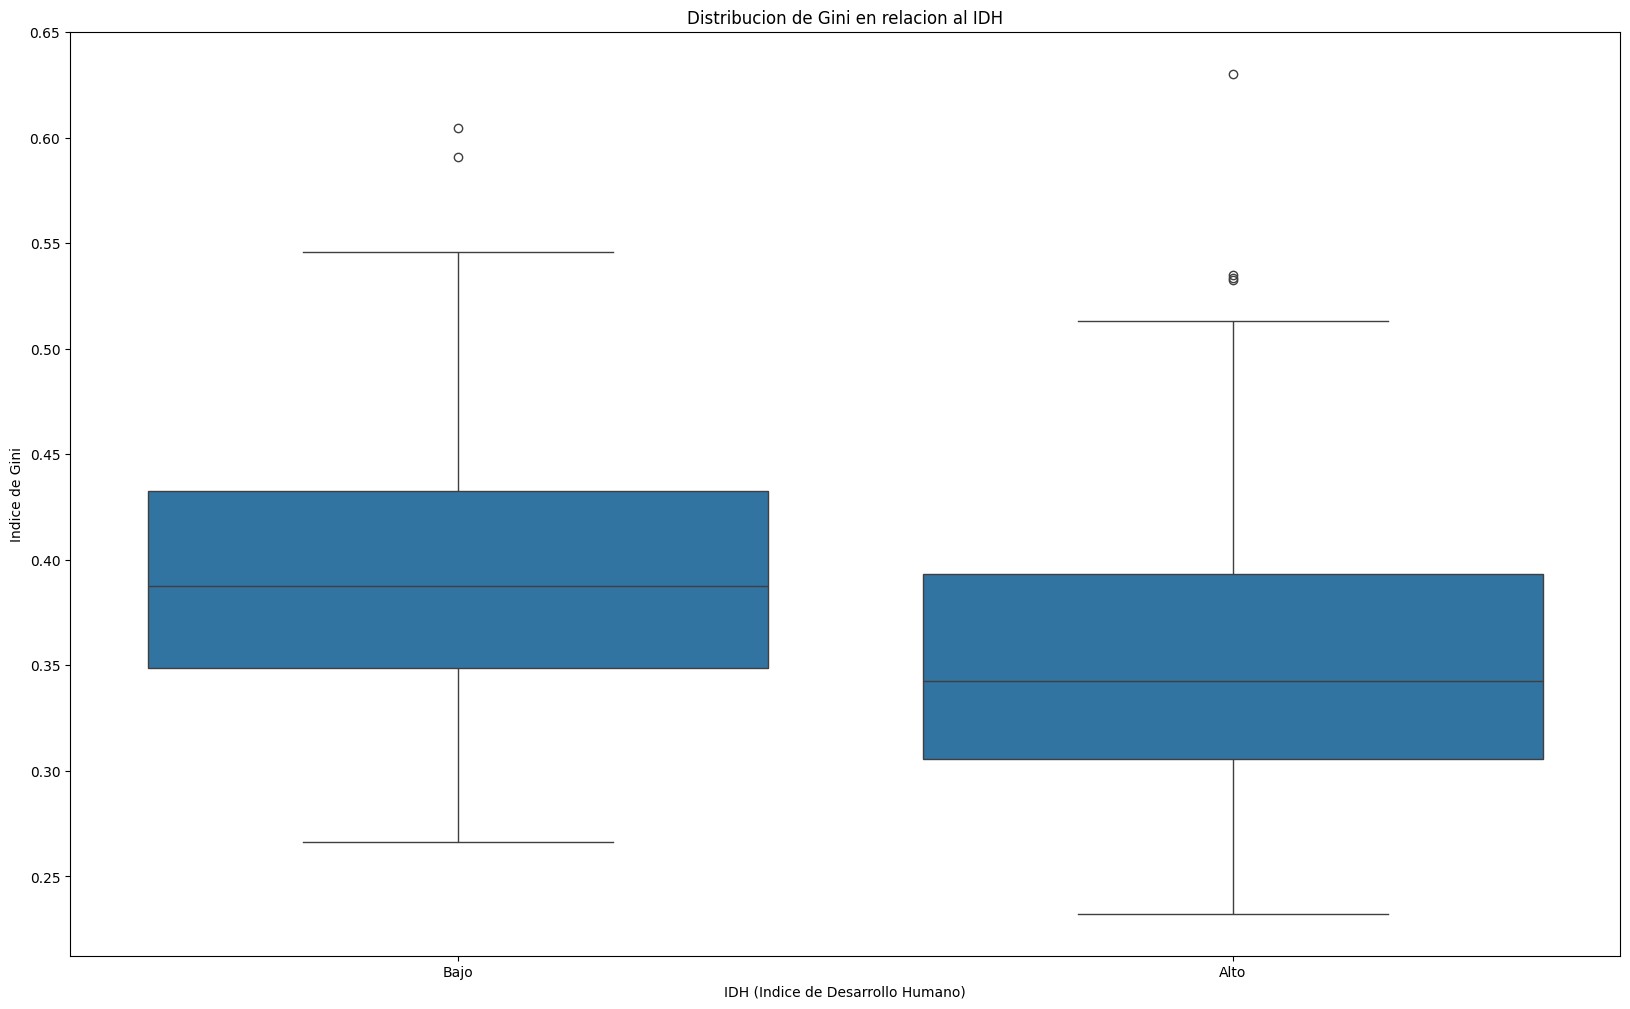

In [307]:
# Combinamos el subset de bajoIDH y altoIDH
dfIDHTotal = pd.concat([bajoIDH, altoIDH]).reset_index(drop = True)

# Creamos el grafico de manera similar al anterior.
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'Desarrollo', y = 'Gini coefficient', data = dfIDHTotal)
plt.title('Distribucion de Gini en relacion al IDH')
plt.xlabel('IDH (Indice de Desarrollo Humano)')
plt.ylabel('Indice de Gini')

# Mostramos el grafico.
plt.show()

En este caso se aprecian outliers en ambas categorias, tanto en paises con IDH alto como bajo, sin embargo, en terminos generales, los paises con IDH bajo tienen mas desigualdad.

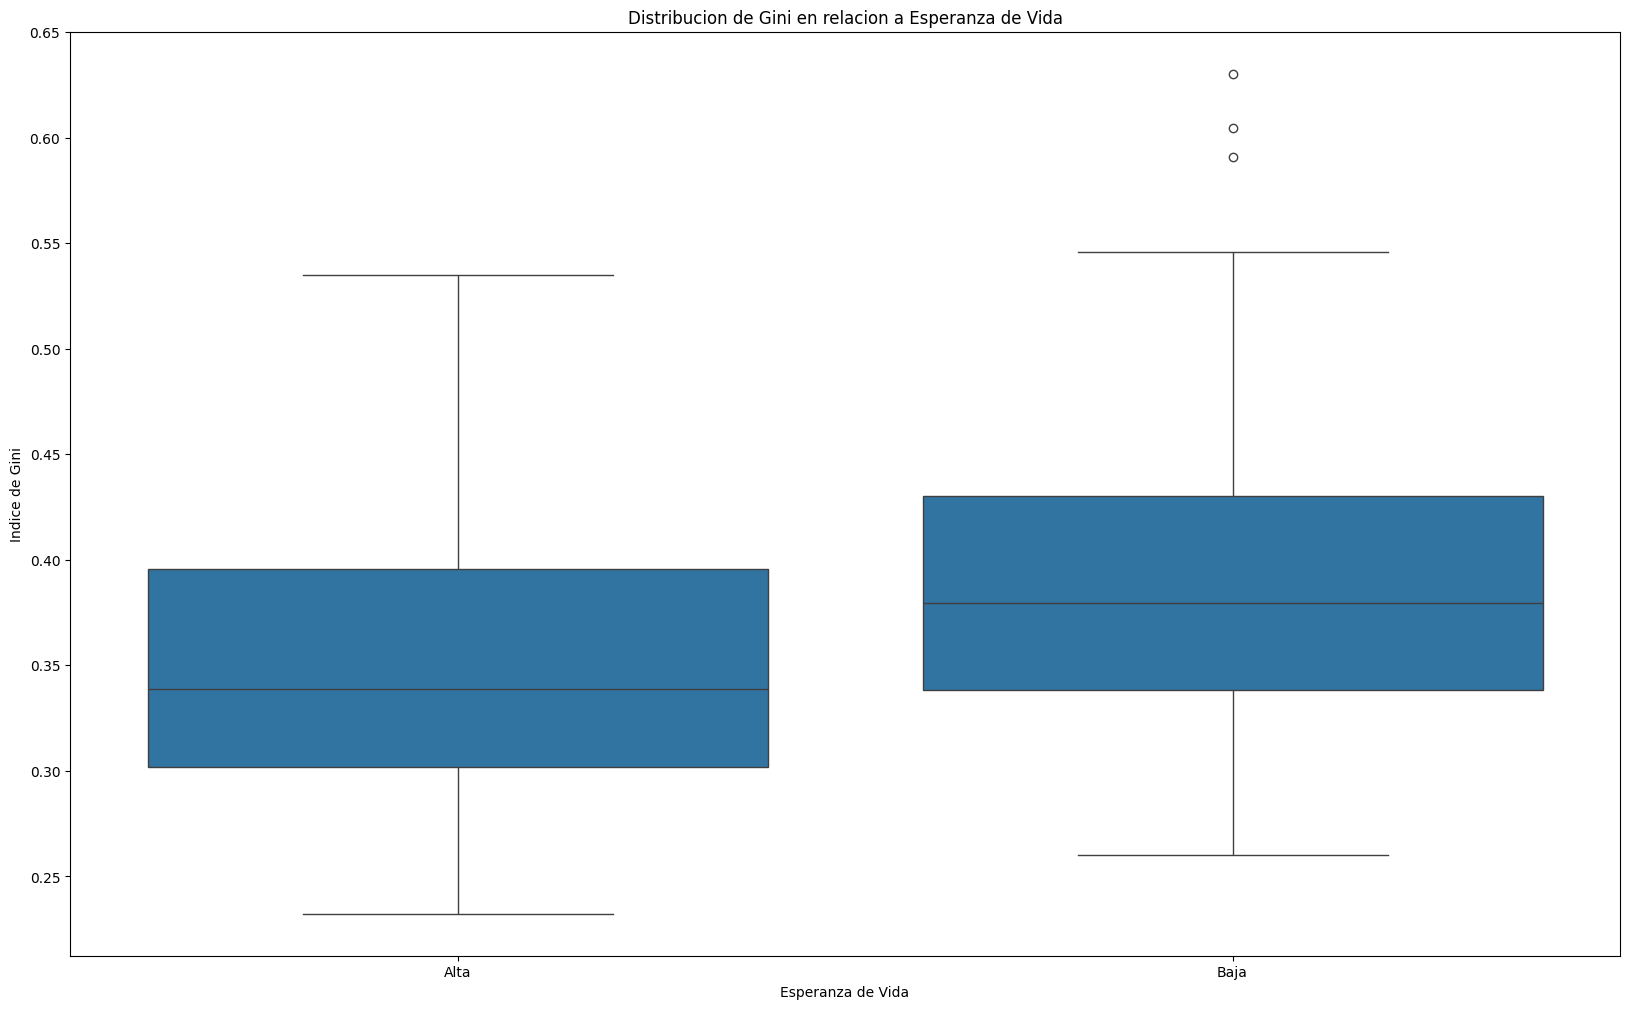

In [308]:
# Combinamos ahora altaVida y bajaVida.
vidaTotal = pd.concat([altaVida, bajaVida]).reset_index(drop = True)

# Nuevamente creamos los dos graficos de cajas.
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'Esperanza de Vida', y = 'Gini coefficient', data = vidaTotal)
plt.title('Distribucion de Gini en relacion a Esperanza de Vida')
plt.xlabel('Esperanza de Vida')
plt.ylabel('Indice de Gini')

# Mostramos el grafico.
plt.show()

Apreciamos entonces que los paises con Esperanza de Vida baja tienen mayor desigualdad, pues los indices de Gini estan mas altos, tambien se aprecian outliers.

## 10. Pruebas de normalidad

Se aplicaran los test de normalidad sobre los grupos comparados con el Indice de Gini.  
Se utiliza el test de Kolmogorov.

Para los 6 subsets se aplicaron los test de normalidad y se obtuvo que todos los datos presentan un valor p mayor a ```0.05```, por tanto todas las variables de interes presentes en los grupos de las pruebas pueden seguir una distribucion normal, no es necesario hacer ninguna transformacion, en las siguientes secciones (que son 3) se puede apreciar el codigo de las pruebas.

In [309]:
from scipy.stats import kstest

#### Test de normalidad sobre los grupos de Africa y Asia.

In [310]:
# Aplicamos los test de normalidad de Kolmogorov a los subset dfAfricano y dfAsiatico
# Aplicamos sobre Gini en dfAfrica
# https://maikolsolis.com/libros/eecr/pruebas-ks.html?form=MG0AV3
statAfrica, pValueAfrica = kstest(dfAfrica['Gini coefficient'].dropna(), 'norm', args = (dfAfrica['Gini coefficient'].mean(), dfAfrica['Gini coefficient'].std()))
print(f"Kolmogorov para 'Gini coefficient' en dfAfrica:\nEstadistica: {statAfrica: .3f}, Valor de P: {pValueAfrica: .3f}")
if (pValueAfrica < 0.05):
    print("Los datos no siguen una distribucion normal.\n")
else:
    print("Los datos podrían seguir una distribución normal.\n")
# Aplicamos sobre Gini en dfAsia
statAsia, pValueAsia = kstest(dfAsia['Gini coefficient'].dropna(), 'norm', args = (dfAsia['Gini coefficient'].mean(), dfAsia['Gini coefficient'].std()))
print(f"Kolmogorov para 'Gini coefficient' en dfAsia:\nEstadistica: {statAsia: .3f}, Valor de P: {pValueAsia: .3f}")
if (pValueAsia < 0.05):
    print("Los datos no siguen una distribucion normal.\n")
else:
    print("Los datos podrían seguir una distribución normal.\n")

Kolmogorov para 'Gini coefficient' en dfAfrica:
Estadistica:  0.106, Valor de P:  0.594
Los datos podrían seguir una distribución normal.

Kolmogorov para 'Gini coefficient' en dfAsia:
Estadistica:  0.079, Valor de P:  0.950
Los datos podrían seguir una distribución normal.



Se puede apreciar que el valor p para ambos grupos es mayor a 0.05, podemos decir entonces que para ambos grupos se presenta una posible distribucion normal, por tanto no hay necesidad de transformar los datos.

#### Test de normalidad sobre grupos de diferentes IDH.

In [311]:
# Aplicamos los test de kolmogorov al grupo altoIDH y bajoIDH sobre la variable de Gini coefficient y sobre HDI
# Primero aplicamos sobre Gini a ambos grupos.
statBajoIDH, pValueBajoIDH = kstest(bajoIDH['Gini coefficient'].dropna(), 'norm', args = (bajoIDH['Gini coefficient'].mean(), bajoIDH['Gini coefficient'].std()))
print(f"Kolmogorov para 'Gini coefficient' en bajoIDH:\nEstadistica: {statBajoIDH: .3f}, Valor p: {pValueBajoIDH: .3f}")
if (pValueBajoIDH < 0.05):
    print("Los datos no siguen una distribucion normal.\n")
else:
    print("Los datos podrían seguir una distribución normal.\n")

statAltoIDH, pValueAltoIDH = kstest(altoIDH['Gini coefficient'].dropna(), 'norm', args = (altoIDH['Gini coefficient'].mean(), altoIDH['Gini coefficient'].std()))
print(f"Kolmogorov para 'Gini coefficient' en altoIDH:\nEstadistica: {statAltoIDH: .3f}, Valor p: {pValueAltoIDH: .3f}")
if (pValueAltoIDH < 0.05):
    print("Los datos no siguen una distribucion normal.\n")
else:
    print("Los datos podrían seguir una distribución normal.\n")

Kolmogorov para 'Gini coefficient' en bajoIDH:
Estadistica:  0.078, Valor p:  0.777
Los datos podrían seguir una distribución normal.

Kolmogorov para 'Gini coefficient' en altoIDH:
Estadistica:  0.133, Valor p:  0.054
Los datos podrían seguir una distribución normal.



Para el coeficiente de Gini en ambos grupos, niveles altos de IDH y bajos de IDH,se aprecia una distribucion que podria ser normal, dado que el valor P en ambos grupos es mayor a 0.05, no necesitamos hacer transformaciones para este dato.

In [312]:
# Aplicamos los test de kolmogorov sobre la variable de HDI
statBajoIDH2, pValueBajoIDH2 = kstest(bajoIDH['HDI'].dropna(), 'norm', args = (bajoIDH['HDI'].mean(), bajoIDH['HDI'].std()))
print(f"Kolmogorov para 'HDI' en bajoIDH:\nEstadistica: {statBajoIDH2: .3f}, Valor p: {pValueBajoIDH2: .3f}")
if (pValueBajoIDH2 < 0.05):
    print("Los datos no siguen una distribucion normal.\n")
else:
    print("Los datos podrían seguir una distribución normal.\n")

statAltoIDH2, pValueAltoIDH2 = kstest(altoIDH['HDI'].dropna(), 'norm', args = (altoIDH['HDI'].mean(), altoIDH['HDI'].std()))
print(f"Kolmogorov para 'HDI' en altoIDH:\nEstadistica: {statAltoIDH2: .3f}, Valor p: {pValueAltoIDH2: .3f}")
if (pValueAltoIDH2 < 0.05):
    print("Los datos no siguen una distribucion normal.\n")
else:
    print("Los datos podrían seguir una distribución normal.\n")

Kolmogorov para 'HDI' en bajoIDH:
Estadistica:  0.097, Valor p:  0.484
Los datos podrían seguir una distribución normal.

Kolmogorov para 'HDI' en altoIDH:
Estadistica:  0.082, Valor p:  0.360
Los datos podrían seguir una distribución normal.



Apreciamos que para el HDI, en ambos grupos, tambien nos encontramos con una posible distribucion normal, ambos P son mayores a 0.05, no precisamos de una transformacion.

#### Test de normalidad entre grupos con distinta esperanza de vida

In [313]:
# Aplicamos ahora Kolmogorov a los grupos de bajaVida y altaVida

# Como ya me canse, me digno a hacer una funcion, un poco tarde eso si...
def kolmo(parx, nombreData, variable):
    stat, pvalue = kstest(parx[variable].dropna(), 'norm', args = (parx[variable].mean(), parx[variable].std()))
    print(f"Kolmogorov para '{variable}' en {nombreData}:\nEstadistica {stat: .3f}, Valor p: {pvalue: .3f}")
    if (pvalue < 0.05):
        print("Los datos no siguen una distribucion normal.\n")
    else:
        print("Los datos podrían seguir una distribución normal.\n")

# Llamamos a la funcion
kolmo(bajaVida, 'bajaVida', 'Gini coefficient')
kolmo(altaVida, 'altaVida', 'Gini coefficient')

# La llamamos para HDI
kolmo(bajaVida, 'bajaVida', 'HDI')
kolmo(altaVida, 'altaVida', 'HDI')

Kolmogorov para 'Gini coefficient' en bajaVida:
Estadistica  0.097, Valor p:  0.382
Los datos podrían seguir una distribución normal.

Kolmogorov para 'Gini coefficient' en altaVida:
Estadistica  0.132, Valor p:  0.097
Los datos podrían seguir una distribución normal.

Kolmogorov para 'HDI' en bajaVida:
Estadistica  0.089, Valor p:  0.410
Los datos podrían seguir una distribución normal.

Kolmogorov para 'HDI' en altaVida:
Estadistica  0.084, Valor p:  0.463
Los datos podrían seguir una distribución normal.



Apreciamos que tanto en el grupo de baja esperanza de vida como en el de alta esperanza de vida, la variable HDI y Gini presentan un valor P mayor a 0.05, por tanto pueden seguir una districion normal y no necesitamos hacer transformaciones.

## 11. Test estadisticos

Como los test de normalidad mostraron que las variables de interes en los grupos pueden seguir una distribucion normal, se usara el Test T, dado que asume que los datos en los grupos siguen una distribucion normal.  

Definimos entonces el valor T como una medida utilizada para indicar una diferencia entre la media de dos grupos, cuanto mas alejado de cero mas significativa sera la diferencia de las medias entre grupos.  

El valor P tiene criterios:
* ***P > 0.05***: Las diferencias que se observan pueden ser producto del azar.
* ***0.01 < P <= 0.05***: Indica que las diferencias observadas pueden ser significativas.
* ***P <= 0.01***: Esto nos indica que las diferencias que se observan son altamente significativas.

### Prueba-T sobre grupos de Africa y Asia.

In [314]:
# Se aplicara el T-test sobre Gini en los subset de Africa y Asia.
# El metodo fue tomado del siguiente sitio: https://www.datacamp.com/es/tutorial/an-introduction-to-python-t-tests

# Subsets.
tAfrica = dfAfrica['Gini coefficient'].dropna()
tAsia = dfAsia['Gini coefficient'].dropna()

# Tamanho de las muestras.
mAfrica = tAfrica.count()
mAsia = tAsia.count()

# Grados de libertad.
dof = (min(mAfrica, mAsia) - 1)

# Calculamos el test.
tStat, pVal = stats.ttest_ind(tAfrica, tAsia, equal_var = False)

print(f"t-statistic = {tStat: .10f}")  
print(f"p-value = {pVal: .10f}")

t-statistic =  6.0445399480
p-value =  0.0000000439


Segun el valor T, que es de ```6.0445399480``` se tiene que la diferencia entre las medias de los dos grupos (Africa y Asia), es significativa. Por otro lado, el valor P, que es menor a ```0.01```, nos indica que las diferencias que se observan son altamente significativas, en terminos de la variable Gini, que es la que se analiza.

### Prueba-T sobre grupos de diferentes IDH

In [315]:
# en este caso haremos una funcion para las pruebas T y la usaremos en esta comparacion y la siguiente.
def tTest(subset1, subset2, varInteres):
    # subset
    tempA = subset1[varInteres].dropna()
    tempB = subset2[varInteres].dropna()

    # Tamanho de las muestras
    mA = tempA.count()
    mB = tempB.count()

    # Grados de libertad
    dof = (min(mA, mB) - 1)

    # Calculo del test
    tStat, pVal = stats.ttest_ind(tempA, tempB, equal_var = False)

    print(f"t-statistic = {tStat: .10f}")  
    print(f"p-value = {pVal: .10f}")

# Llamamos a la funcion con los subsets de interes, en este caso bajoIDH y altoIDH
tTest(bajoIDH, altoIDH, 'Gini coefficient')

t-statistic =  3.4085500206
p-value =  0.0008461071


Podemos observar que el valor T es ```3.4085500206``` mientras que el valor P es ```0.0008461071```, esto nos indica que las medias de los dos grupos tienen una diferencia significativa y que las diferencias observadas son altamente significativas, es muy improbable que las medias sean producto de azar...

### Prueba-T entre grupos de diferentes esperanzas de vida

In [316]:
# Llamamos a la funcion para altaVida y bajaVida.
tTest(altaVida, bajaVida, 'Gini coefficient')

t-statistic = -3.1428226061
p-value =  0.0019830790


Se observa un valor T negativo, mas precisamente ```-3.1428226061```, esto nos indica que la media del primer grupo, en este caso el de menor esperanza de vida, es mayor con respecto a la del segundo grupo, en otras palabras, la media de la variable de Gini es mayor en el grupo con menor esperanza de vida.  

Por otro lado, tenemos un valor P ```0.0019830790``` que es menor a 0.01, por tanto podemos decir que las diferencias observadas son altamente significativas y es muy improbable que sean por azar.

## 12. Interpretacion de resultados

* En la comparacion de Africa y Asia, se tiene que, segun el valor T y el valor P, la media de Gini es mayor en Africa que en Asia, tambien se tiene que la diferencia observada es significativa y no producto del azar.  

* Comparando los subset de IDH alto e IDH bajo, tenemos que el grupo con el IDH bajo posee una media mayor en el indice de Gini que el grupo de alto IDH, tambien se tiene que las diferencias son significativas y no producto del azar.  

* Por ultimo en la comparacion del subset de esperanza de vida alto y esperanza de vida bajo, la media del indice de Gini es mayor en el grupo de menor esperanza de vida, nuevamente apreciamos que las diferencias son significativas y no producto del azar.

***Conclusion***: podemos decir que la desigualdad si se ve afectada de manera significativa dependiendo de los factores como el Indice de Desarrollo Humano (IDH), la Esperanza de Vida y el Continente (en este caso Africa y Asia).

## 13. Conclusiones del proyecto

Se hizo la primera entrega utilizando una enorme cantidad de bases de datos que no seguian un formato en comun. Lo anterior causó que el proceso de investigacion se complicara de manera innecesaria y que los resultados tuvieran poca precision. 

Por ejemplo, si se decidia utilizar datos de desigualdad de ```Kaggle```, pero datos de ```PIB``` tomados del Banco Mundial, no todos los paises iban a estar en ambas bases de datos, iban a haber muchos valores NaN para varios de los datos (esto nos sucedio principalmente con las bases de datos del Banco Mundial), y luego de intentar unir ambos conjuntos de datos, ibamos a terminar con datos poco precisos, desactualizados y con pocas filas, pues, se debian descartar los NaN.  

Dadas estas limitaciones, los resultados obtenidos en la primera entrega (la que subimos a Mediacion Virtual) fueron imprecisos y poco concluyentes. Nos dimos cuenta de todo esto al intentar desarrollar la segunda entrega y ver que era practicamente imposible proceder dado lo desorganizado que estaba nuestra entrega 1. Por lo tanto, volvimos a hacer la primera entrega pero con bases de datos que todas siguieran un mismo formato: datos tomados del sitio web ```Our World in Data```.

 Las bases de datos de esta fuente eran casi totalmente carentes de valores NaN y tenian todas un mismo formato, junto con el codigo del pais, por lo que resultaba sumamente sencillo unirlas en un solo data frame.  

En resumen, de escoger malas bases de datos aprendimos como identificar problemas con las bases de datos y aprendimos estrategias para recopilar datos de mejor calidad, como que todos los datos vengan de una misma fuente y que esa fuente tenga fiabilidad (no como muchas de las bases de datos en Kaggle).  

Nos parecio provechoso el aprender a hacer una regresion lienal sin usar bibliotecas de Python, pues, amplió nuestro entendimiento del concepto. De igual manera, logramos adquirir mejores practicas de visualizacion de datos.  

Se puede concluir que resulta complicado predecir la desigualdad. Sin embargo, existe una gran correlacion entre el coeficiente de Gini y la tasa de homicidios. A modo de comparacion, resulta mas facil predecir el IDH a partir de variables como la esperanza de vida y el ingreso per capita. 

Lo anterior se puede constatar viendo los ```R^2``` obtenidos en el punto 4 de la segunda entrega para Gini e IDH, donde se obtenia que ```R^2``` era mayor cuando se le hacia el analisis al IDH. En ese caso eso se debe a que las variables utilizadas para predecir el IDH tenian una mayor correlacion con la variable dependiente que la que tenia Gini con sus variables independientes.  

Asimismo, podemos ver que hay grandes diferencias entre los niveles de desigualdad de Africa y los de Asia pero que por ejemplo, la diferencia en desigualdad entre paises con IDH alto e IDH bajo no es tan significativa.  

De la mayoria de resultados tenemos certeza. De lo que no tenemos certeza, es de si las variables utilizadas eran las mejores o si existia otra serie de variables que se relacionaran de mejor manera con la desigualdad, brindándonos conclusiones más precisas. 

Sin embargo, puede que la ligera inconsistencia en los años disponibles en la base de datos de desigualdad, cause que nuestros resultados sean menos precisos. Otro posible punto de vista para esta problematica, seria investigar si existen otros medios para medir la desigualdad que sean de uso comun.

## Fuentes

1. [Our World in Data](https://ourworldindata.org)
2. [Simon Fraser University - Multiple Regression](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html)
3. [DataCamp - Adjusted R-Squared](https://www.datacamp.com/es/tutorial/adjusted-r-squared)
4. [Repositorio de Investigaciones BCCR - Estimación de los coeficientes de regresión estandarizados ](https://repositorioinvestigaciones.bccr.fi.cr/server/api/core/bitstreams/a2cbbe9f-aa16-4769-ae4f-6bc1a3ab43f9/content)
5. [Universidad de Cantabria - El Modelo de Regresion Lineal Multiple: estimacion](https://ocw.unican.es/pluginfile.php/1098/course/section/691/Ppt_Ch3_G942_14-15.pdf)
6. [W3Schools - Linear Regression in Python](https://www.w3schools.com/python/python_ml_linear_regression.asp)
7. [Maikol Solís - Pruebas KS](https://maikolsolis.com/libros/eecr/pruebas-ks.html?form=MG0AV3)
8. [DataCamp - An Introduction to Python T-Tests](https://www.datacamp.com/es/tutorial/an-introduction-to-python-t-tests)

